## Final Project Submission

Please fill out:
* Student name: Victor Kang
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("data/kc_house_data.csv")

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df["grade"]

In [ ]:
df["view"].value_counts()

In [ ]:
df["grade"].value_counts()

In [ ]:
df["condition"]

In [ ]:
df["condition"].value_counts()

BUILDING CONDITION
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.



BUILDING GRADE
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. 
        Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [ ]:
df

In [ ]:
#df = df.drop(['id', 'view', 'zipcode','lat', 'long','sqft_living15','sqft_lot15' ], axis=1)
#df

In [53]:
df = df.drop(['id'], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info()

In [54]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipcode        2159

In [55]:
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015


In [ ]:
df.info()

In [56]:
df['age_when_sold'] = df['year_sold'] - df['yr_built']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014,5
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11


In [40]:
df["age_when_sold"].value_counts()

 9      472
 8      443
 11     431
 0      430
 10     428
       ... 
 113     28
 115     26
 81      23
 80      21
-1       12
Name: age_when_sold, Length: 117, dtype: int64

In [41]:
df["yr_built"].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [42]:
df[df["age_when_sold"] == -1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold
1761,2014-06-25,597326.0,4,4.00,3570,8250,2.0,NO,NONE,Average,...,2015,NaN,98040,47.5784,-122.226,2230,10000,6,2014,-1
2685,2014-10-29,385195.0,1,1.00,710,6000,1.5,NO,NONE,Average,...,2015,NaN,98144,47.5756,-122.316,1440,4800,10,2014,-1
7519,2014-12-31,614285.0,5,2.75,2730,6401,2.0,NO,NONE,Average,...,2015,0.0,98072,47.7685,-122.160,2520,6126,12,2014,-1
8032,2014-06-24,455000.0,2,1.50,1200,1259,2.0,NO,NONE,Average,...,2015,NaN,98144,47.6001,-122.298,1320,1852,6,2014,-1
14475,2014-08-26,500000.0,2,2.25,1570,1269,2.0,NaN,NONE,Average,...,2015,NaN,98199,47.6514,-122.385,1570,6000,8,2014,-1
17084,2014-06-17,350000.0,3,2.00,1380,3600,3.0,NaN,NONE,Average,...,2015,0.0,98122,47.6074,-122.305,1480,3600,6,2014,-1
19789,2014-08-01,455000.0,3,1.75,1320,1014,3.0,NO,NONE,Average,...,2015,0.0,98122,47.6047,-122.305,1380,1495,8,2014,-1
20754,2014-08-28,357000.0,5,2.50,2990,9240,2.0,NO,NONE,Average,...,2015,0.0,98133,47.7384,-122.348,1970,18110,8,2014,-1
20836,2014-07-09,595000.0,4,3.25,3730,4560,2.0,NO,NONE,Average,...,2015,0.0,98103,47.6725,-122.330,1800,4560,7,2014,-1
20947,2014-07-31,230000.0,3,1.50,1040,1264,2.0,NO,NONE,Average,...,2015,0.0,98144,47.5951,-122.301,1350,3000,7,2014,-1


In [ ]:
#for house in df:
#    if house['age_when_sold'] == -1:
#        house['age_when_sold'] = 0 


In [57]:
df['age_when_sold'] = df['age_when_sold'].apply(lambda x: 0 if x == -1 else x)

In [44]:
df["age_when_sold"].value_counts()

9      472
8      443
0      442
11     431
10     428
      ... 
112     33
113     28
115     26
81      23
80      21
Name: age_when_sold, Length: 116, dtype: int64

In [ ]:
df.info()

In [ ]:
df['sqft_living']

In [ ]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

In [10]:
df.loc[df['sqft_basement'] == '?'][['sqft_living','sqft_lot','sqft_above','sqft_basement']]

,sqft_living,sqft_lot,sqft_above,sqft_basement
6,1715,6819,1715,?
18,1200,9850,1200,?
42,3595,5639,3595,?
79,3450,39683,3450,?
112,1540,12600,1160,?
...,...,...,...,...
21442,2360,5000,1390,?
21447,2330,4907,2330,?
21473,980,1010,980,?
21519,2380,5737,2380,?


In [ ]:
df['sqft_basement'].value_counts()

In [ ]:
df['sqft_basement'].value_counts(normalize=True)

In [58]:
#df['sqft_basement'] = df['sqft_basement'].map(lambda x: (x['sqft_living'] - x['sqft_above']) if x == '?' else x['sqft_basement'])

#recheck this code

#for x in df['sqft_basement']:
    #if x == '?':
df['sqft_basement'] = df['sqft_living'] - df['sqft_above'] 



In [ ]:
df['sqft_basement'].value_counts(normalize=True)

In [ ]:
df['sqft_basement'].value_counts()

In [ ]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

In [ ]:
df.info()

In [ ]:
df['waterfront'].value_counts()

In [ ]:
df['yr_renovated'].value_counts(normalize=True)

In [ ]:
df['yr_renovated'].value_counts().head(50)

In [ ]:
df['waterfront'].isna().sum()

In [59]:
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [60]:
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x == 'YES' else 0)
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [ ]:
df.info()

In [ ]:
df['yr_renovated'].isna().sum()

In [ ]:
df['yr_renovated'].describe()

In [61]:
df['yr_renovated'].fillna(0.0, inplace=True)

In [62]:
df['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [63]:
df['yr_renovated'].value_counts(normalize=True)

0.0       0.965551
2014.0    0.003380
2013.0    0.001435
2003.0    0.001435
2007.0    0.001389
            ...   
1951.0    0.000046
1953.0    0.000046
1946.0    0.000046
1976.0    0.000046
1948.0    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [64]:
def reno(year):
    if year > 1:
        return 1
    else:
        return 0

df['recent_reno']  = df['yr_renovated'].apply(reno)

In [ ]:
df.info()

In [65]:
df['recent_reno'].sum()

744

In [ ]:
df.head()

In [66]:
df = df.drop(['date', 'yr_built','yr_renovated' ], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,NONE,Average,7 Average,...,0,98178,47.5112,-122.257,1340,5650,10,2014,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,NONE,Average,7 Average,...,400,98125,47.7210,-122.319,1690,7639,12,2014,63,1
2,180000.0,2,1.00,770,10000,1.0,0,NONE,Average,6 Low Average,...,0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,NONE,Very Good,7 Average,...,910,98136,47.5208,-122.393,1360,5000,12,2014,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,NONE,Average,8 Good,...,0,98074,47.6168,-122.045,1800,7503,2,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,NONE,Average,8 Good,...,0,98103,47.6993,-122.346,1530,1509,5,2014,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,NONE,Average,8 Good,...,0,98146,47.5107,-122.362,1830,7200,2,2015,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,NONE,Average,7 Average,...,0,98144,47.5944,-122.299,1020,2007,6,2014,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0,NONE,Average,8 Good,...,0,98027,47.5345,-122.069,1410,1287,1,2015,11,0


In [ ]:
df['condition'].isna().sum()

In [ ]:
df['condition'].value_counts()

In [ ]:
df['grade'].value_counts()

In [67]:
condition_key = {'Poor':1.0 , 'Fair':2.0 , 'Average':3.0 , 'Good':4.0 , 'Very Good':5.0}

In [68]:
grade_key = {'3 Poor':3.0,
             '4 Low':4.0,
             '5 Fair':5.0,
             '6 Low Average':6.0,
             '7 Average': 7.0,
             '8 Good':8.0,
             '9 Better':9.0,
             '10 Very Good':10.0,
             '11 Excellent':11.0,
             '12 Luxury': 12.0,
             '13 Mansion':13.0}

In [69]:
view_key = {'NONE':1.0 , 'AVERAGE':2.0 , 'GOOD':3.0 , 'FAIR':4.0 , 'EXCELLENT':5.0}

In [70]:
df['view'] = df['view'].replace(view_key)

In [71]:
df['condition'] = df['condition'].replace(condition_key)

In [72]:
df['grade'] = df['grade'].replace(grade_key)

In [ ]:
df.info()

In [ ]:
df['condition'].value_counts()

In [ ]:
df['condition'].value_counts(normalize=True)

In [ ]:
df['grade'].value_counts()

In [ ]:
df['grade'].value_counts(normalize=True)

In [73]:
import numpy as np

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_validate, ShuffleSplit

In [ ]:
df['price'].max()

In [ ]:
df['price'].sort_values(ascending=False).head(10)

In [ ]:
df['bedrooms'].sort_values(ascending=False).head(10)

In [ ]:
df.describe()

In [77]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,1.195907,0.687319,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [74]:
df = df.drop('year_sold', axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,47.5112,-122.257,1340,5650,10,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,47.7210,-122.319,1690,7639,12,63,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,770,0,98028,47.7379,-122.233,2720,8062,2,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,47.5208,-122.393,1360,5000,12,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,47.6168,-122.045,1800,7503,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,47.6993,-122.346,1530,1509,5,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,47.5107,-122.362,1830,7200,2,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,47.5944,-122.299,1020,2007,6,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,47.5345,-122.069,1410,1287,1,11,0


In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21534.0,1.196480,0.688242,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [ ]:
df.info()

In [ ]:
df['view'].value_counts()

In [ ]:
df['view'].value_counts(normalize=True)

In [76]:
df['view'].fillna(1.0, inplace=True)

In [29]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,47.5112,-122.257,1340,5650,10,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,47.7210,-122.319,1690,7639,12,63,1
2,180000.0,2,1.00,770,10000,1.0,0,1.0,3.0,6.0,770,0,98028,47.7379,-122.233,2720,8062,2,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,47.5208,-122.393,1360,5000,12,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,47.6168,-122.045,1800,7503,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,47.6993,-122.346,1530,1509,5,5,0
21593,400000.0,4,2.50,2310,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,47.5107,-122.362,1830,7200,2,1,0
21594,402101.0,2,0.75,1020,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,47.5944,-122.299,1020,2007,6,5,0
21595,400000.0,3,2.50,1600,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,47.5345,-122.069,1410,1287,1,11,0


In [ ]:
# drop outliers using z score

In [30]:
# z = np.abs(stats.zscore(df))
# z.head(50)

In [32]:
z.head(50)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,0.866716,0.402903,1.451073,0.980652,0.228182,0.915552,0.082500,0.285037,0.629986,0.560800,0.735251,0.659031,1.869645,0.352894,0.305695,0.943676,0.260627,1.099853,0.533642,0.166270
1,0.006252,0.402903,0.174486,0.533369,0.189739,0.937431,0.082500,0.285037,0.629986,0.560800,0.460776,0.244602,0.879210,1.161376,0.746286,0.432887,0.187700,1.741910,0.669809,6.014326
2,0.980773,1.482493,1.451073,1.427234,0.123139,0.915552,0.082500,0.285037,0.629986,1.413190,1.230575,0.659031,0.933473,1.283355,0.135144,1.070292,0.172190,1.468374,1.316600,0.166270
3,0.173409,0.676687,1.149821,0.131057,0.243878,0.915552,0.082500,0.285037,2.444427,0.560800,0.892305,1.396734,1.084772,0.283604,1.272151,0.914488,0.284459,1.741910,0.193226,0.166270
4,0.082471,0.402903,0.150626,0.436040,0.169503,0.915552,0.082500,0.285037,0.629986,0.291589,0.131197,0.659031,0.073850,0.409293,1.200840,0.272353,0.192686,1.468374,0.521649,0.166270
5,1.877461,0.676687,3.100491,3.637657,2.096766,0.915552,0.082500,0.285037,0.629986,2.848758,2.538722,2.797366,0.466286,0.692948,1.485092,4.047461,3.269500,0.505289,1.032274,0.166270
6,0.769809,0.402903,0.174486,0.397917,0.199953,0.937431,0.082500,0.285037,0.629986,0.560800,0.088913,0.659031,1.400659,1.807258,0.803136,0.366863,0.217765,0.184260,0.828024,0.166270
7,0.676303,0.402903,0.800849,1.111359,0.130118,0.915552,0.082500,0.285037,0.629986,0.560800,0.880224,0.659031,2.243395,1.086933,0.717860,0.491263,0.111729,1.789402,0.295351,0.166270
8,0.846028,0.402903,1.451073,0.327118,0.184233,0.915552,0.082500,0.285037,0.629986,0.560800,0.892305,0.990099,1.271647,0.344955,0.874199,0.301541,0.170320,0.826317,0.397476,0.166270
9,0.591509,0.402903,0.499597,0.207303,0.206208,0.937431,0.082500,0.285037,0.629986,0.560800,0.122506,0.659031,0.746598,1.383580,1.300328,0.588691,0.190230,1.147345,1.066315,0.166270


In [ ]:
#continuous = ['sqft_living' , 'sqft_lot' , 'sqft_above' , 'sqft_basement']

In [ ]:
#discrete = ['bedrooms' , 'bathrooms' , 'floors' , 'age_when_sold']

In [ ]:
#categorical = ['waterfront' , 'condition' , 'grade' , 'month_sold' , 'recent_reno'] 

In [ ]:
#df[continuous+ ['price']].corr()


<AxesSubplot:>

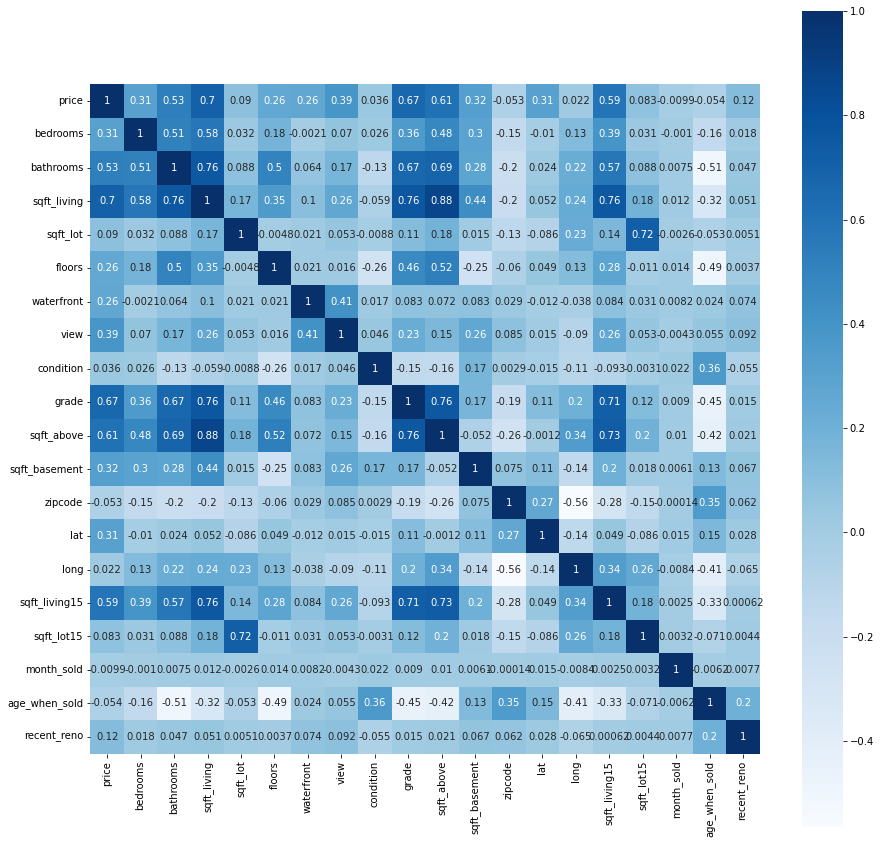

In [78]:
plt.figure(figsize=(15,15))
#sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues", mask=np.triu(np.ones_like(df.corr(), dtype=bool)),)
sns.heatmap(df.corr(), annot=True, square=True, cmap= "Blues")

In [79]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.386430,0.036056,0.667951,0.605368,0.323799,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928,-0.053896,0.117543
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.070475,0.026496,0.356563,0.479386,0.302808,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046,-0.155824,0.017635
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.169760,-0.126479,0.665838,0.686668,0.283440,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543,-0.507568,0.046742
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.262220,-0.059445,0.762779,0.876448,0.435130,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112,-0.318599,0.050829
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.052990,-0.008830,0.114731,0.184139,0.015418,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591,-0.052860,0.005091
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.016413,-0.264075,0.458794,0.523989,-0.245715,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245,-0.489500,0.003713
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.412224,0.016648,0.082818,0.071778,0.082800,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.008199,0.024405,0.074267
view,0.386430,0.070475,0.169760,0.262220,0.052990,0.016413,0.412224,1.000000,0.046191,0.227019,0.149484,0.264325,0.085281,0.014710,-0.090301,0.260412,0.053175,-0.004335,0.055097,0.092437
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.046191,1.000000,-0.146896,-0.158904,0.173849,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.022388,0.360834,-0.055383
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.227019,-0.146896,1.000000,0.756073,0.168220,-0.185771,0.113575,0.200341,0.713867,0.120981,0.008989,-0.448321,0.015259


In [80]:
most_correlated = "sqft_living"

In [81]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition        float64
grade            float64
sqft_above         int64
sqft_basement      int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
month_sold         int64
age_when_sold      int64
recent_reno        int64
dtype: object

In [ ]:
#df['waterfront'] = df['waterfront'].apply(lambda x: 0 if False else 1)
#df['recent_reno'] = df['recent_reno'].apply(lambda x: 0 if False else 1)

In [ ]:
#df.dtypes

In [82]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.006760,0.081944,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,1.195907,0.687319,1.0000,1.0000,1.0000,1.000,5.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [ ]:
#just trying stats models OLS here with all features to see what we get

In [ ]:
# X = df.drop('price', axis=1)
# y = df['price']

# model = sm.OLS(y, sm.add_constant(X)).fit()
# model.summary()

In [ ]:
#Quick model try above

In [ ]:
# df.dtypes

In [ ]:
#establish baseline simple linear regression model using only most correlated feature

In [ ]:
most_correlated

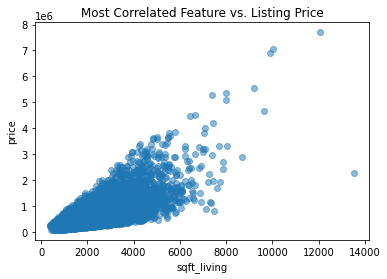

In [83]:
fig, ax = plt.subplots()

ax.scatter(df[most_correlated], df['price'], alpha=0.5)
ax.set_xlabel(most_correlated)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [84]:
baseline_model = LinearRegression()


In [85]:

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=df[[most_correlated]],
    y=df['price'],
    return_train_score=True,
    cv=splitter
)



In [86]:
baseline_scores

{'fit_time': array([0.00656009, 0.00324798, 0.0024519 ]),
 'score_time': array([0.00183702, 0.00153494, 0.00126529]),
 'test_score': array([0.48322208, 0.50717038, 0.51680952]),
 'train_score': array([0.4951006 , 0.48588579, 0.48225339])}

In [87]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [ ]:
## score improved.. but. what am i really doing up there. following lab

In [ ]:
df.dtypes

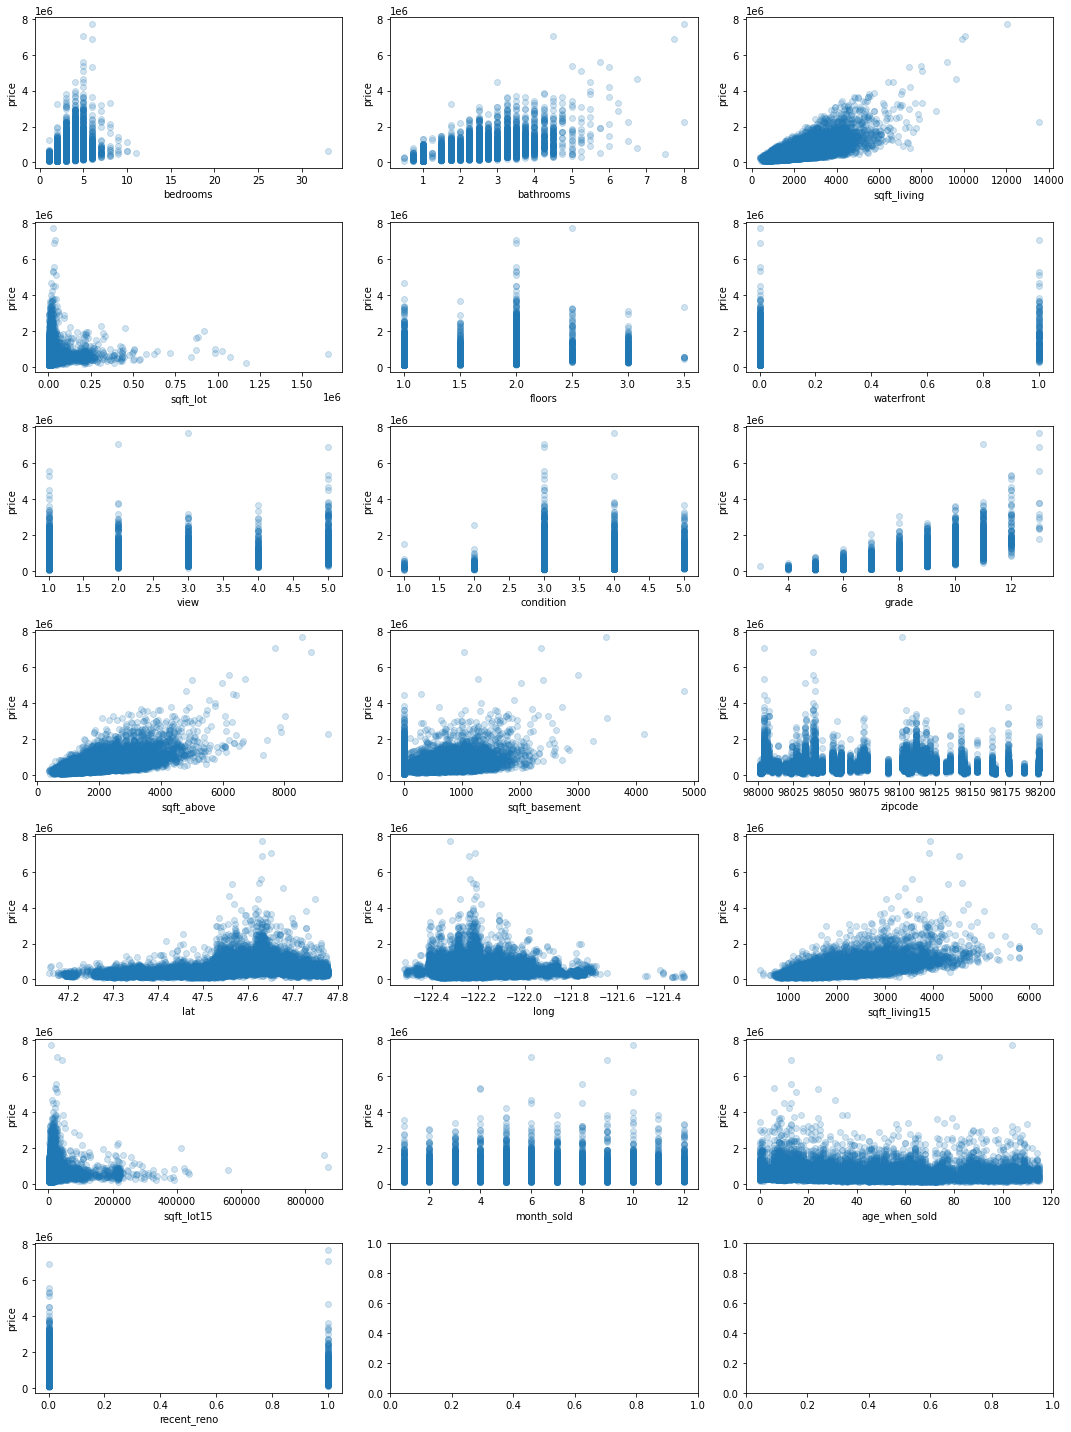

In [88]:
scatterplot_data = df.drop("price",axis=1)

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(15, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df[col], df["price"], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [89]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=df.drop("price",axis=1),
    y=df['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model - Linear Regression with all Features")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model - Linear Regression with only Most Correlated Feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model - Linear Regression with all Features
Train score:      0.6962008920298226
Validation score: 0.7127689954787648

Baseline Model - Linear Regression with only Most Correlated Feature
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [90]:
sm.OLS(df['price'], sm.add_constant(df.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2814.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:15:38   Log-Likelihood:            -2.9434e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21578   BIC:                         5.889e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.525e+06   2.88e+06      0.530      0.596   -4.11e+06    7.16e+06
bedrooms       -3.62e+04   1896.367    -19.088      0.000   -3.99e+04   -3.25e+04
bathrooms      4.206e+04   3255.912     12.919      0.000    3.57e+04    4.84e+04
sqft_living     110.1893      2.273     48.474      0.000     105.734     114.645
sqft_lot          0.1386      0.048      2.898      0.004       0.045       0.232
floors         8711.2011   3593.211      2.424      0.015    1668.242    1.58e+04
waterfront     5.964e+05   1.84e+04     32.459      0.000     5.6e+05    6.32e+05
view           6.088e+04   2363.708     25.757      0.000    5.63e+04    6.55e+04
condition      2.696e+04   2341.556     11.512      0.000    2.24e+04    3.15e+04
grade          9.784e+04   2153.476     45.433      0.000    9.36e+04    1.02e+05
sqft_above       70.2483      2.247     31.262      0.000      65.844      74.653
sqft_basement    39.9394      2.638     15.139      0.000      34.769      45.110
zipcode        -578.6880     32.892    -17.594      0.000    -643.158    -514.218
lat             5.97e+05   1.07e+04     55.798      0.000    5.76e+05    6.18e+05
long          -2.125e+05   1.31e+04    -16.174      0.000   -2.38e+05   -1.87e+05
sqft_living15    21.4434      3.441      6.231      0.000      14.698      28.189
sqft_lot15       -0.3755      0.073     -5.129      0.000      -0.519      -0.232
month_sold    -2767.3868    439.258     -6.300      0.000   -3628.365   -1906.408
age_when_sold  2682.4379     71.666     37.430      0.000    2541.968    2822.908
recent_reno    4.525e+04   7923.330      5.710      0.000    2.97e+04    6.08e+04
==============================================================================
Omnibus:                    18374.466   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1878759.740
Skew:                           3.565   Prob(JB):                         0.00
Kurtosis:                      48.133   Cond. No.                     3.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.36e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# y = df['price']
# logprice = np.log1p(y)

In [ ]:
# logprice

In [ ]:
# sm.OLS(logprice, sm.add_constant(df.drop("price",axis=1))).fit().summary()

In [ ]:
# second2_model = LinearRegression()

# second2_model_scores = cross_validate(
#     estimator=second_model,
#     X=df.drop("price",axis=1),
#     y=logprice,
#     return_train_score=True,
#     cv=splitter
# )
# print("Current Model")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()
# print("Second Model")
# print("Train score:     ", second_model_scores["train_score"].mean())
# print("Validation score:", second_model_scores["test_score"].mean())
# print()
# print("Baseline Model")
# print("Train score:     ", baseline_scores["train_score"].mean())
# print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
#address multicollinearity first

In [91]:
abs(df.corr()) > 0.75


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


In [92]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

dfcorr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
dfcorr['pairs'] = list(zip(dfcorr.level_0, dfcorr.level_1))

# set index to pairs
dfcorr.set_index(['pairs'], inplace = True)

#d rop level columns
dfcorr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
dfcorr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
dfcorr.drop_duplicates(inplace=True)



In [93]:
dfcorr[(dfcorr.cc>.75) & (dfcorr.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


In [ ]:
#these are interesting results. let's evaluate the pairs and eliminate sqft_above, year_sold

In [94]:
df = df.drop(['sqft_living'], axis=1)
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,47.5112,-122.257,1340,5650,10,59,0
1,538000.0,3,2.25,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,47.7210,-122.319,1690,7639,12,63,1
2,180000.0,2,1.00,10000,1.0,0,1.0,3.0,6.0,770,0,98028,47.7379,-122.233,2720,8062,2,82,0
3,604000.0,4,3.00,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,47.5208,-122.393,1360,5000,12,49,0
4,510000.0,3,2.00,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,47.6168,-122.045,1800,7503,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,47.6993,-122.346,1530,1509,5,5,0
21593,400000.0,4,2.50,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,47.5107,-122.362,1830,7200,2,1,0
21594,402101.0,2,0.75,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,47.5944,-122.299,1020,2007,6,5,0
21595,400000.0,3,2.50,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,47.5345,-122.069,1410,1287,1,11,0


In [ ]:
##use domain knowledge to choose features i want to use
#get rid year sold
#get rid of sq.ft above and sq.ft basementt because sq.living already accounts for that and probably causes much colinearity.
#get rid of 


In [95]:
y = df['price']

In [96]:
sm.OLS(y, sm.add_constant(df.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2814.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:16:21   Log-Likelihood:            -2.9434e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21578   BIC:                         5.889e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.525e+06   2.88e+06      0.530      0.596   -4.11e+06    7.16e+06
bedrooms       -3.62e+04   1896.367    -19.088      0.000   -3.99e+04   -3.25e+04
bathrooms      4.206e+04   3255.912     12.919      0.000    3.57e+04    4.84e+04
sqft_lot          0.1386      0.048      2.898      0.004       0.045       0.232
floors         8711.2011   3593.211      2.424      0.015    1668.242    1.58e+04
waterfront     5.964e+05   1.84e+04     32.459      0.000     5.6e+05    6.32e+05
view           6.088e+04   2363.708     25.757      0.000    5.63e+04    6.55e+04
condition      2.696e+04   2341.556     11.512      0.000    2.24e+04    3.15e+04
grade          9.784e+04   2153.476     45.433      0.000    9.36e+04    1.02e+05
sqft_above      180.4375      3.670     49.161      0.000     173.243     187.632
sqft_basement   150.1287      4.382     34.257      0.000     141.539     158.719
zipcode        -578.6880     32.892    -17.594      0.000    -643.158    -514.218
lat             5.97e+05   1.07e+04     55.798      0.000    5.76e+05    6.18e+05
long          -2.125e+05   1.31e+04    -16.174      0.000   -2.38e+05   -1.87e+05
sqft_living15    21.4434      3.441      6.231      0.000      14.698      28.189
sqft_lot15       -0.3755      0.073     -5.129      0.000      -0.519      -0.232
month_sold    -2767.3868    439.258     -6.300      0.000   -3628.365   -1906.408
age_when_sold  2682.4379     71.666     37.430      0.000    2541.968    2822.908
recent_reno    4.525e+04   7923.330      5.710      0.000    2.97e+04    6.08e+04
==============================================================================
Omnibus:                    18374.466   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1878759.740
Skew:                           3.565   Prob(JB):                         0.00
Kurtosis:                      48.133   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# sm.OLS(logprice, sm.add_constant(df.drop("price",axis=1))).fit().summary()

In [ ]:
#better condition number but still something is very wrong
#probably cuz many of the features, while having numeric values, are not really continuous! they're more categorical

In [ ]:
df.info()

In [ ]:
df.columns

In [97]:
numerical = ['sqft_living15', 'sqft_lot','sqft_lot15','sqft_above', 'sqft_basement','lat','long','age_when_sold']

In [98]:
kindaboth = ['bedrooms', 'bathrooms', 'floors']

In [99]:
categorical = ['waterfront', 'view', 'condition', 'grade', 'month_sold','recent_reno','zipcode']

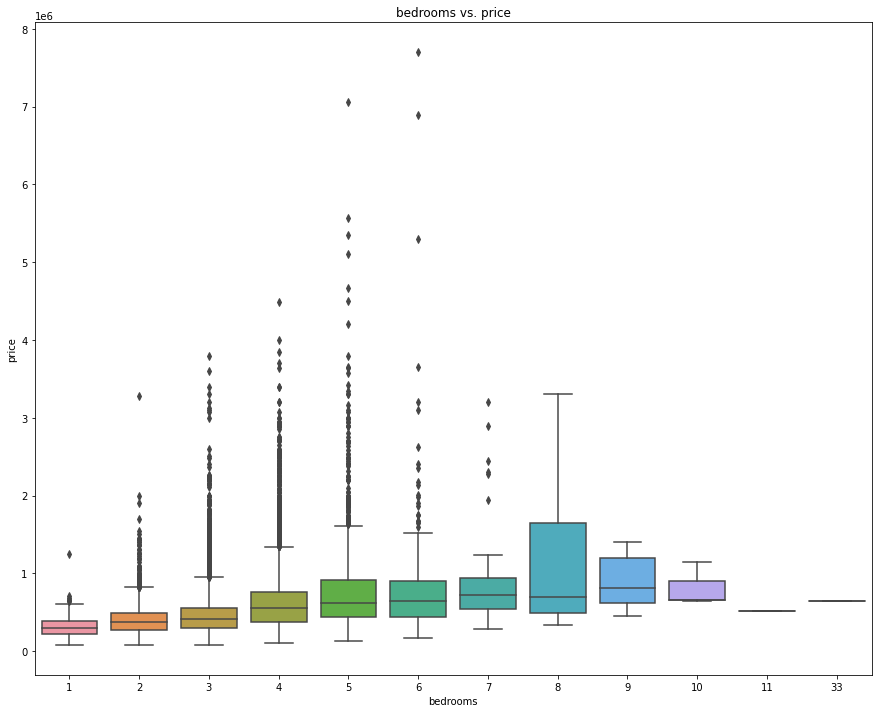

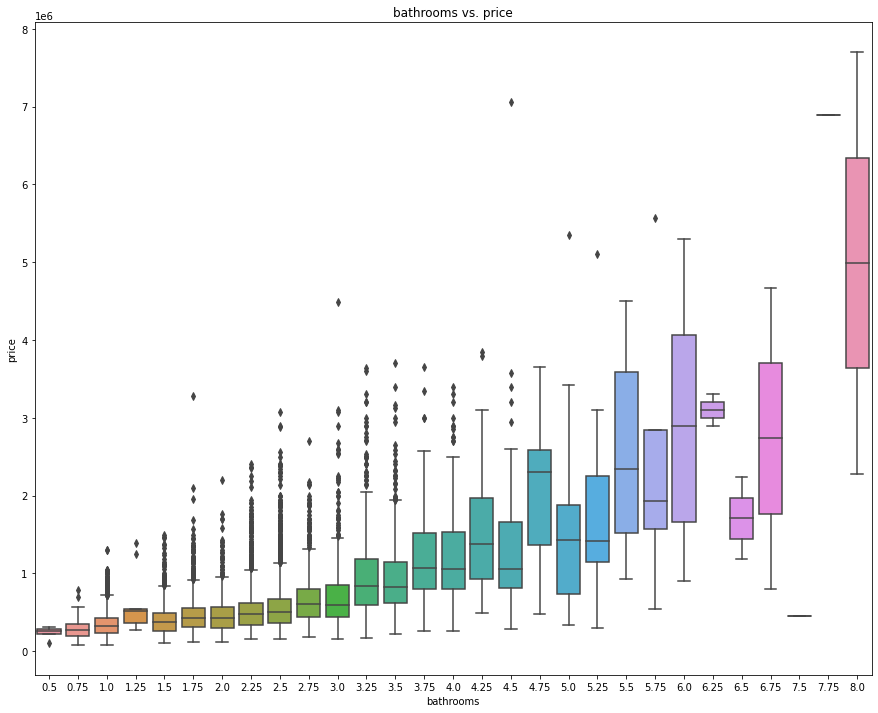

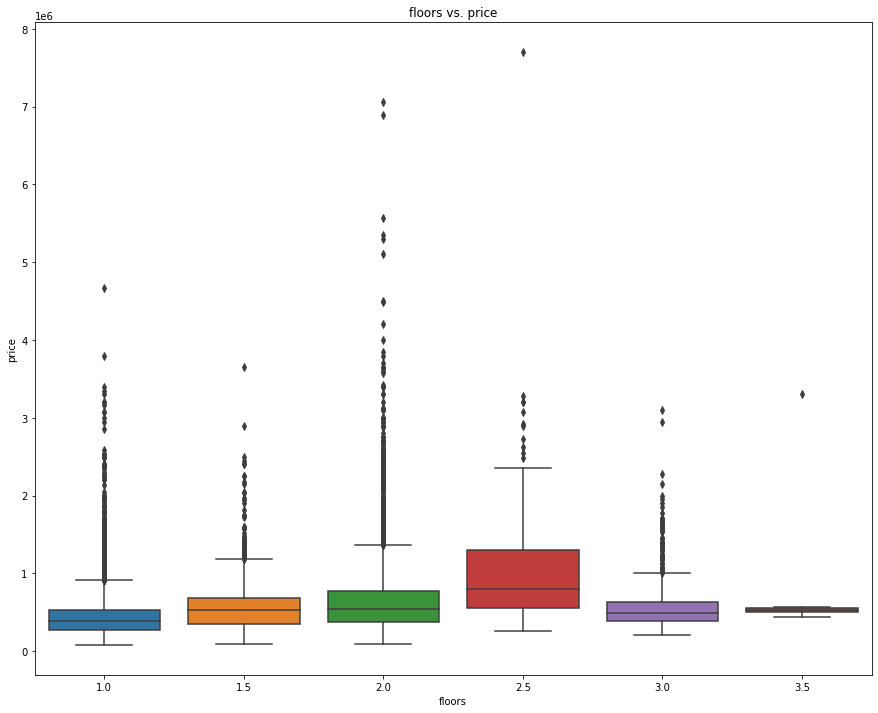

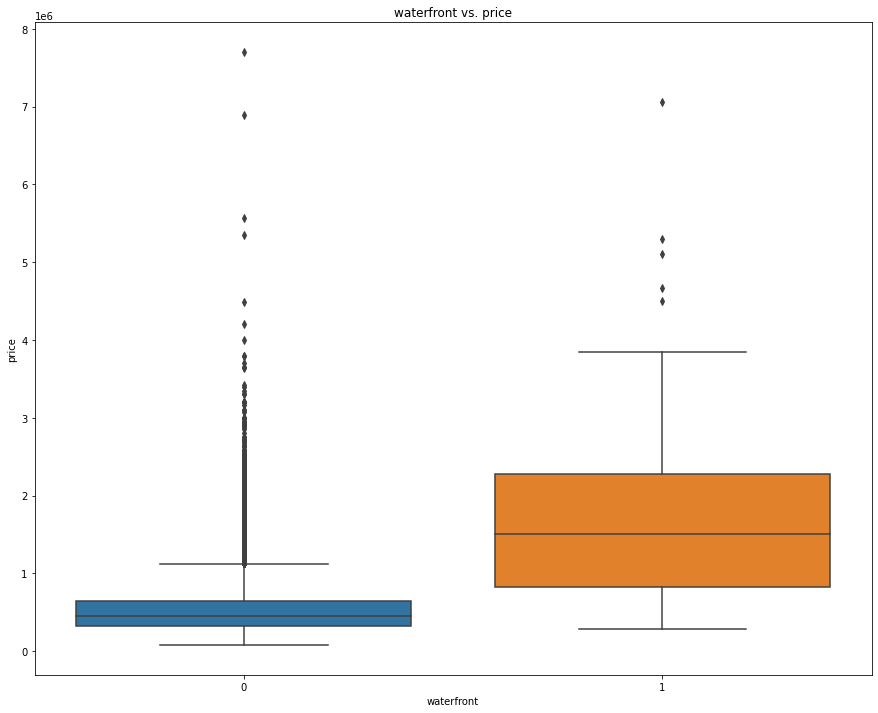

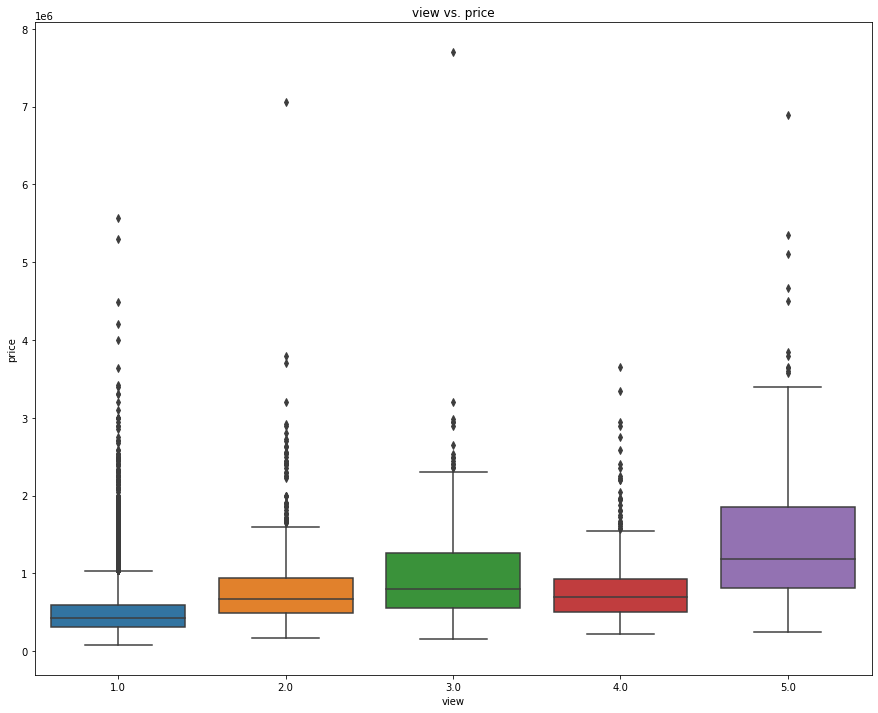

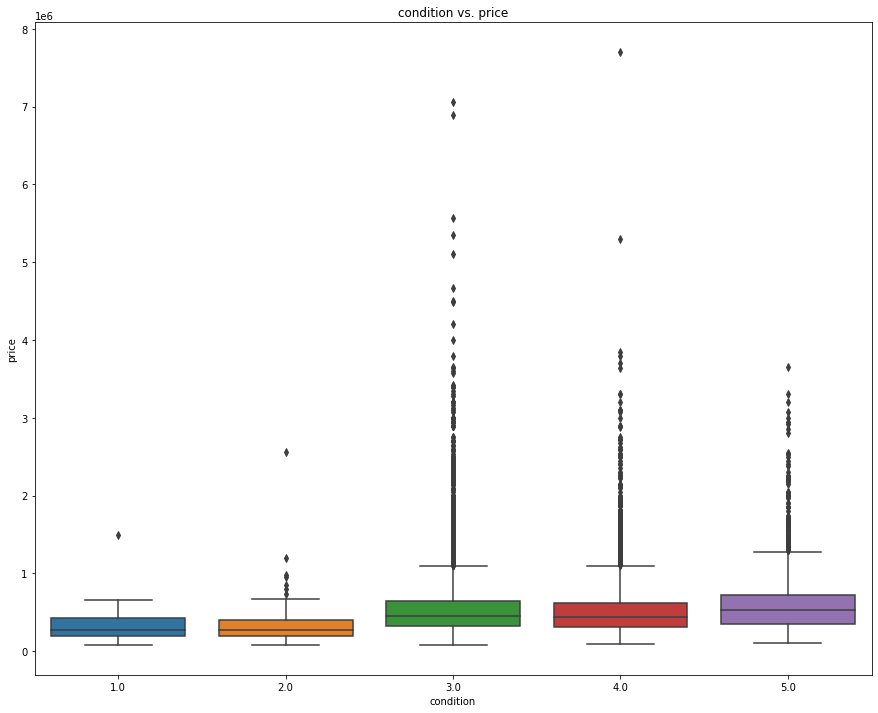

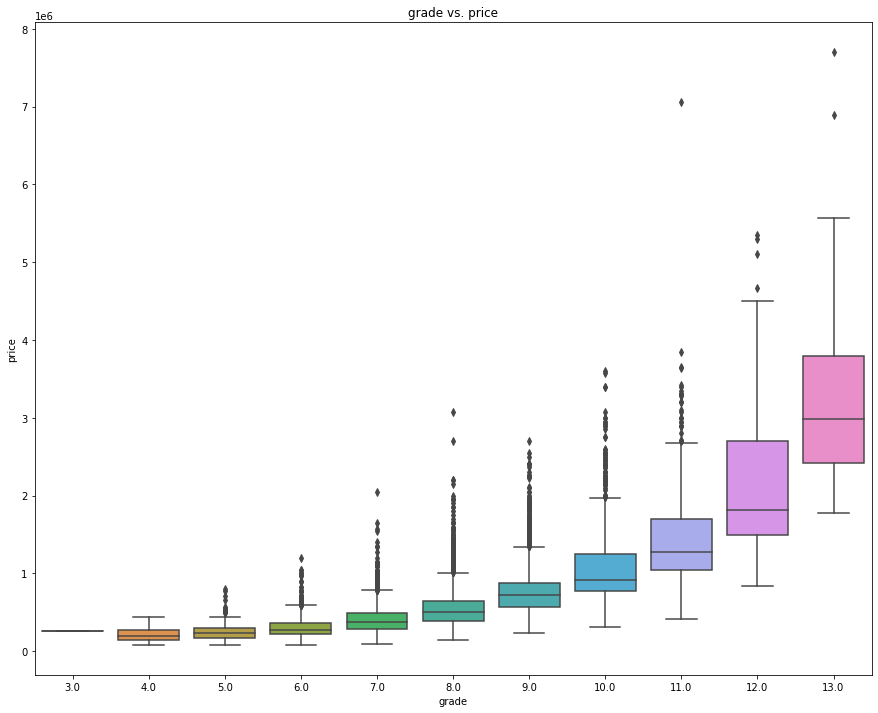

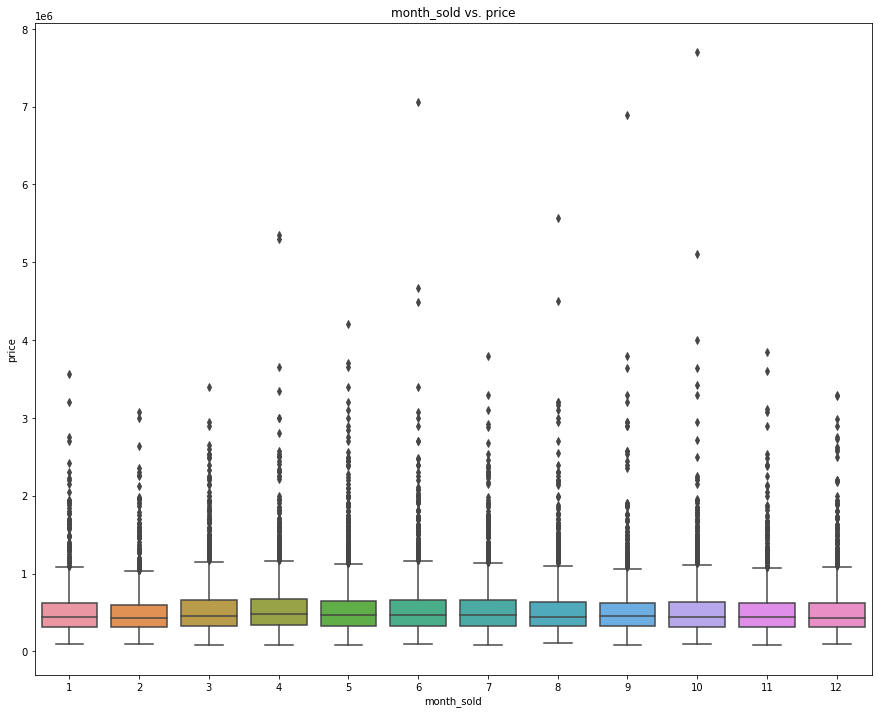

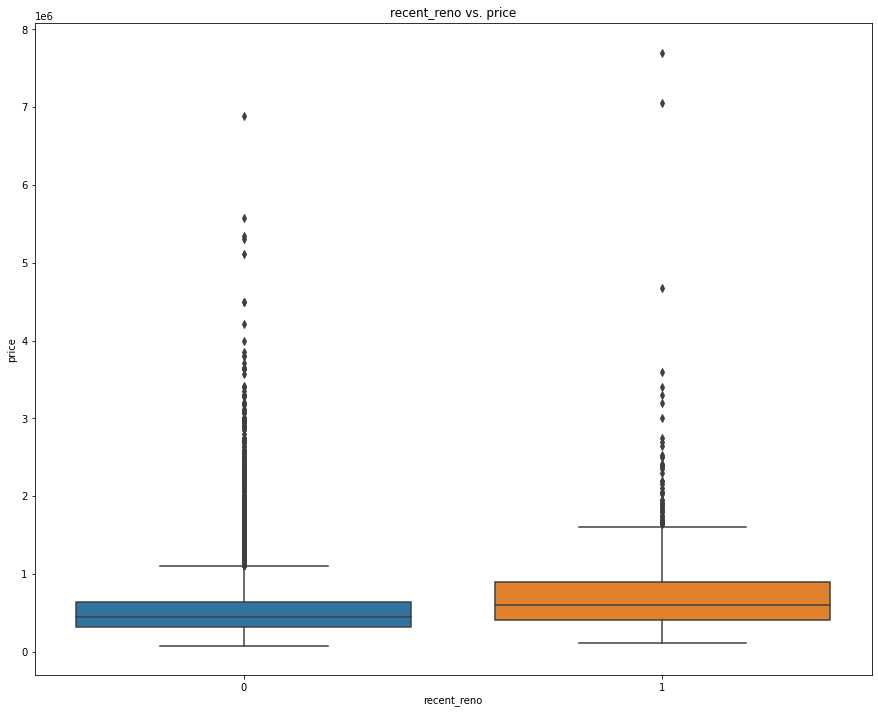

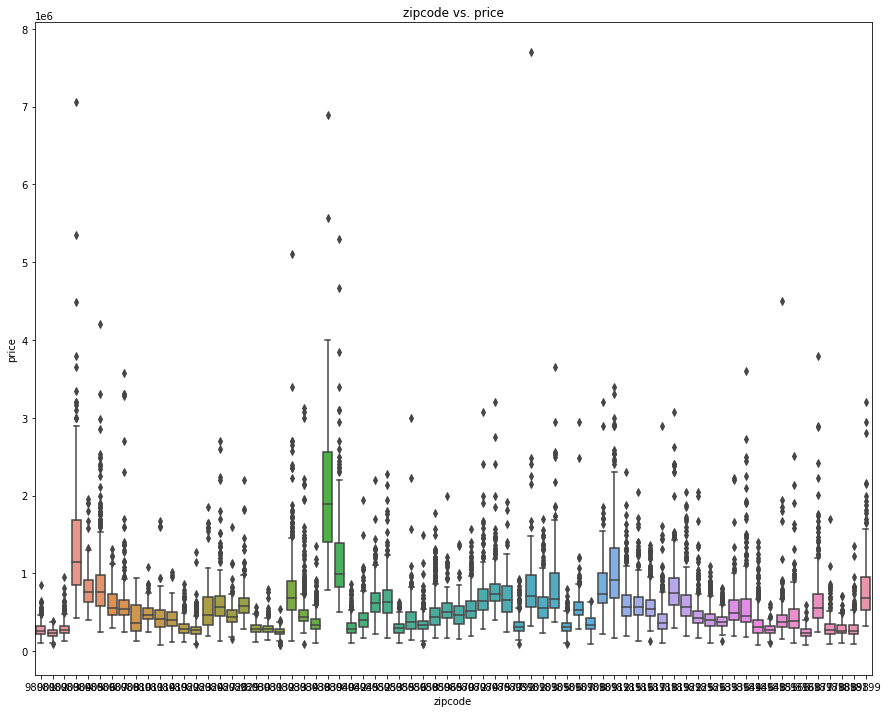

In [100]:
for variable in (kindaboth+categorical):
    ax, figure = plt.subplots(1,1,figsize=(15,12))
    sns.boxplot(x=variable, y='price', data=df)
    plt.title("{} vs. price".format(variable))

In [ ]:
#lets get rid of thatt one data point with over 30 bedrooms what!? talk about outlier!

In [103]:
# df2 = df.loc[df['bedrooms'] < 30]
# # 

In [122]:
df

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,5650,1.0,0,1.0,3.0,7.0,1180,0,98178,47.5112,-122.257,1340,5650,10,59,0
1,538000.0,3,2.25,7242,2.0,0,1.0,3.0,7.0,2170,400,98125,47.7210,-122.319,1690,7639,12,63,1
2,180000.0,2,1.00,10000,1.0,0,1.0,3.0,6.0,770,0,98028,47.7379,-122.233,2720,8062,2,82,0
3,604000.0,4,3.00,5000,1.0,0,1.0,5.0,7.0,1050,910,98136,47.5208,-122.393,1360,5000,12,49,0
4,510000.0,3,2.00,8080,1.0,0,1.0,3.0,8.0,1680,0,98074,47.6168,-122.045,1800,7503,2,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0,1.0,3.0,8.0,1530,0,98103,47.6993,-122.346,1530,1509,5,5,0
21593,400000.0,4,2.50,5813,2.0,0,1.0,3.0,8.0,2310,0,98146,47.5107,-122.362,1830,7200,2,1,0
21594,402101.0,2,0.75,1350,2.0,0,1.0,3.0,7.0,1020,0,98144,47.5944,-122.299,1020,2007,6,5,0
21595,400000.0,3,2.50,2388,2.0,0,1.0,3.0,8.0,1600,0,98027,47.5345,-122.069,1410,1287,1,11,0


In [123]:
z = np.abs(stats.zscore(df[numerical+kindaboth]))
z.head(50)

,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement,lat,long,age_when_sold,bedrooms,bathrooms,floors
0,0.943676,0.228182,0.260627,0.735251,0.659031,0.352894,0.305695,0.533642,0.402903,1.451073,0.915552
1,0.432887,0.189739,0.187700,0.460776,0.244602,1.161376,0.746286,0.669809,0.402903,0.174486,0.937431
2,1.070292,0.123139,0.172190,1.230575,0.659031,1.283355,0.135144,1.316600,1.482493,1.451073,0.915552
3,0.914488,0.243878,0.284459,0.892305,1.396734,0.283604,1.272151,0.193226,0.676687,1.149821,0.915552
4,0.272353,0.169503,0.192686,0.131197,0.659031,0.409293,1.200840,0.521649,0.402903,0.150626,0.915552
5,4.047461,2.096766,3.269500,2.538722,2.797366,0.692948,1.485092,1.032274,0.676687,3.100491,0.915552
6,0.366863,0.199953,0.217765,0.088913,0.659031,1.807258,0.803136,0.828024,0.402903,0.174486,0.937431
7,0.491263,0.130118,0.111729,0.880224,0.659031,1.086933,0.717860,0.295351,0.402903,0.800849,0.915552
8,0.301541,0.184233,0.170320,0.892305,0.990099,0.344955,0.874199,0.397476,0.402903,1.451073,0.915552
9,0.588691,0.206208,0.190230,0.122506,0.659031,1.383580,1.300328,1.066315,0.402903,0.499597,0.937431


In [124]:
z.shape

(21597, 11)

In [125]:
df2 = df[(z<4).all(axis=1)]

In [126]:
df2.shape

(21022, 19)

In [127]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21022.0,527494.932404,328434.160554,78000.0000,320000.0000,449000.0000,635000.0000,3.800000e+06
bedrooms,21022.0,3.357720,0.880467,1.0000,3.0000,3.0000,4.0000,7.000000e+00
bathrooms,21022.0,2.093283,0.737681,0.5000,1.5000,2.2500,2.5000,5.000000e+00
sqft_lot,21022.0,10773.146989,14058.007965,520.0000,5000.0000,7500.0000,10283.7500,1.776570e+05
floors,21022.0,1.490486,0.540325,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront,21022.0,0.006327,0.079290,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,21022.0,1.187137,0.672037,1.0000,1.0000,1.0000,1.0000,5.000000e+00
condition,21022.0,3.412473,0.651428,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,21022.0,7.624393,1.128283,3.0000,7.0000,7.0000,8.0000,1.300000e+01
sqft_above,21022.0,1754.532442,770.592506,370.0000,1182.5000,1550.0000,2170.0000,5.050000e+03


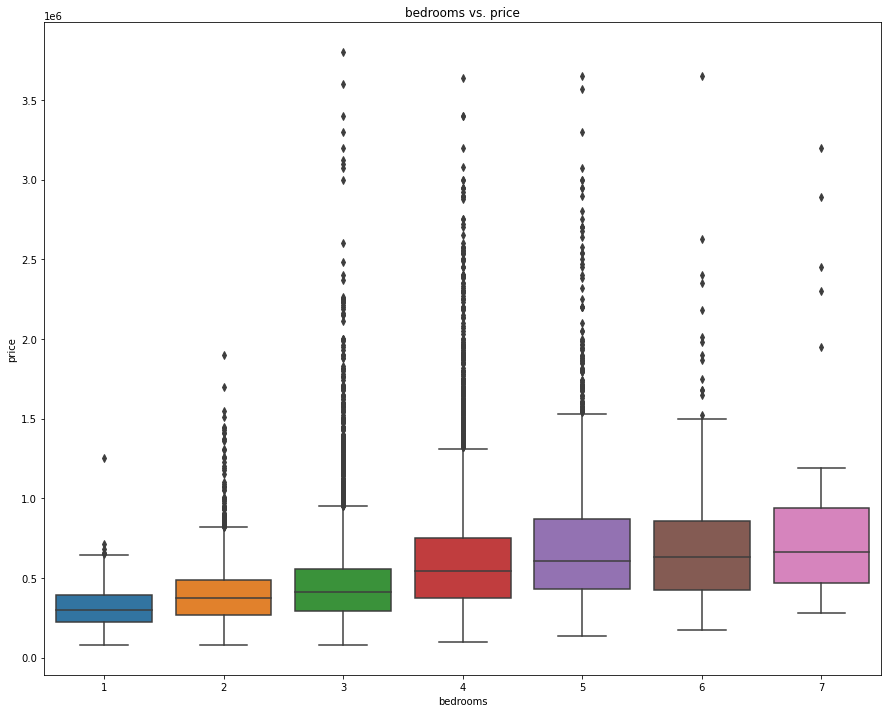

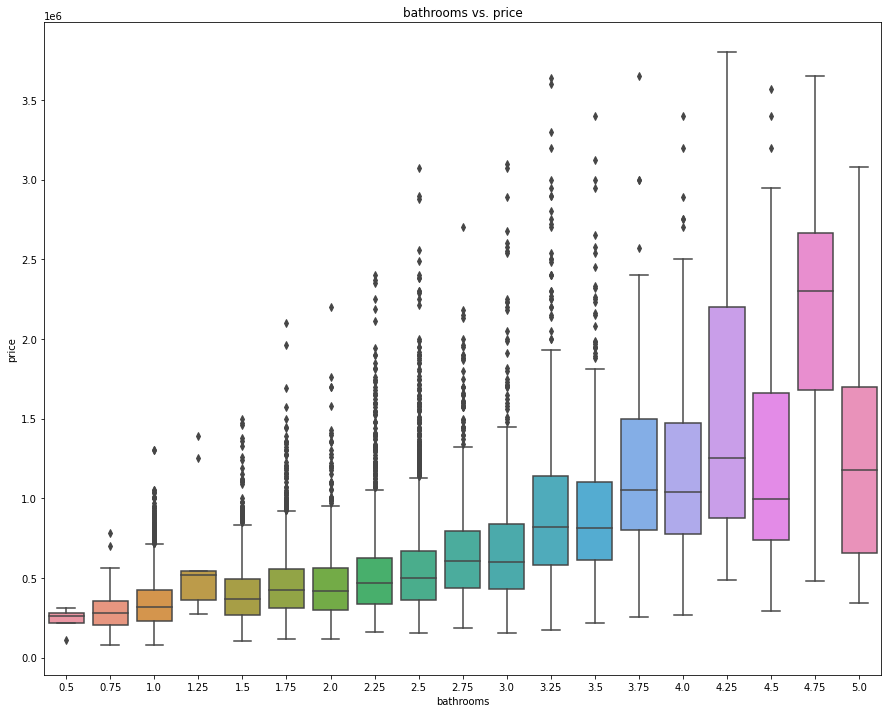

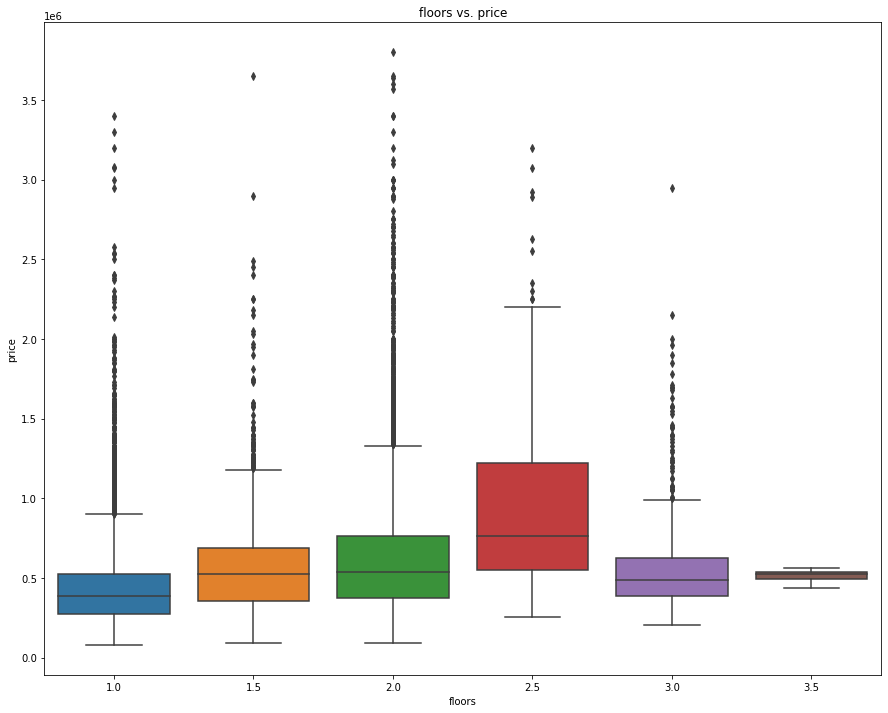

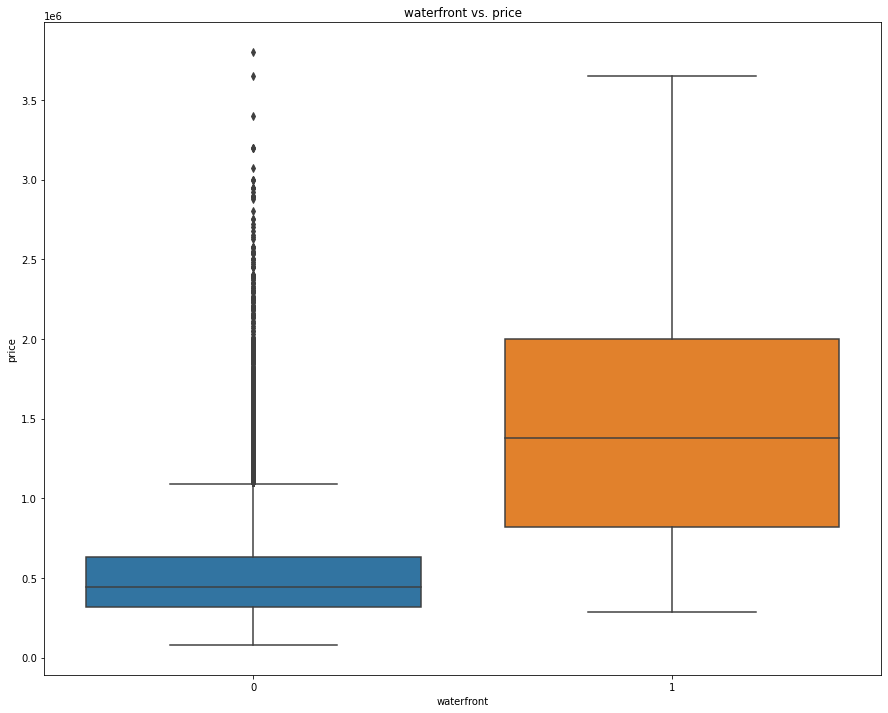

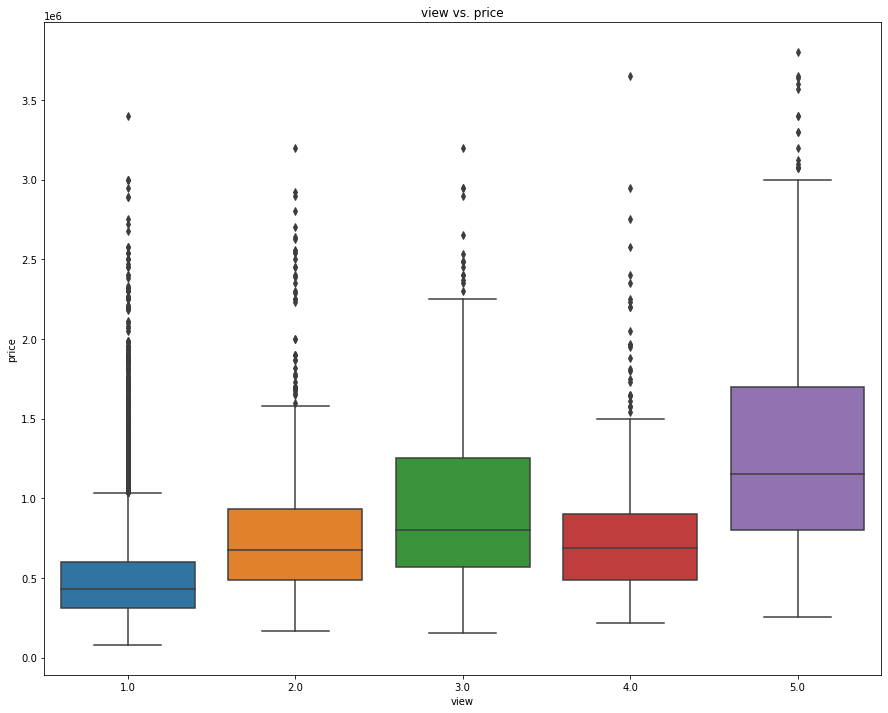

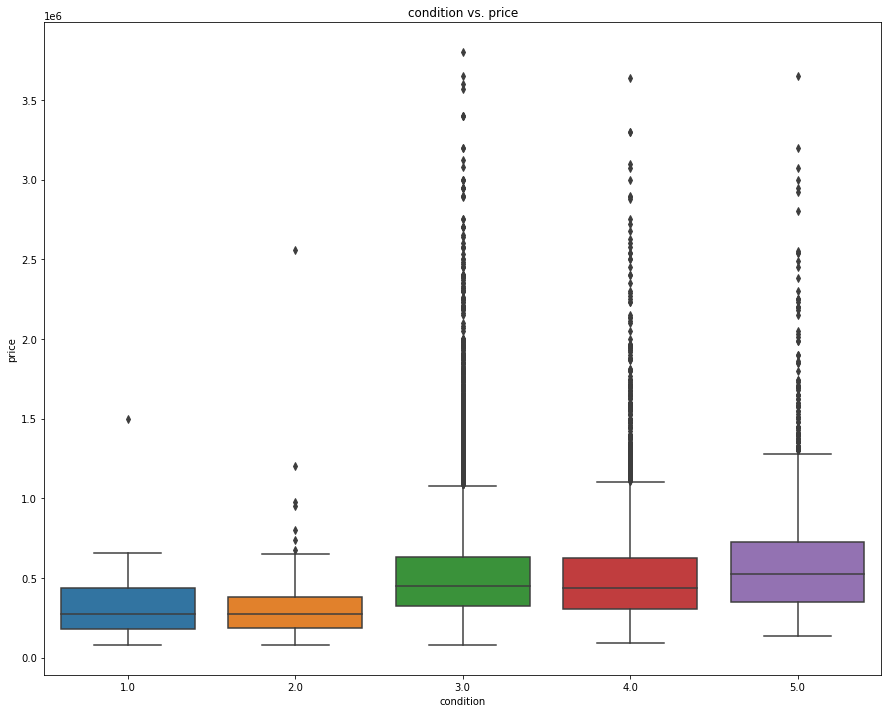

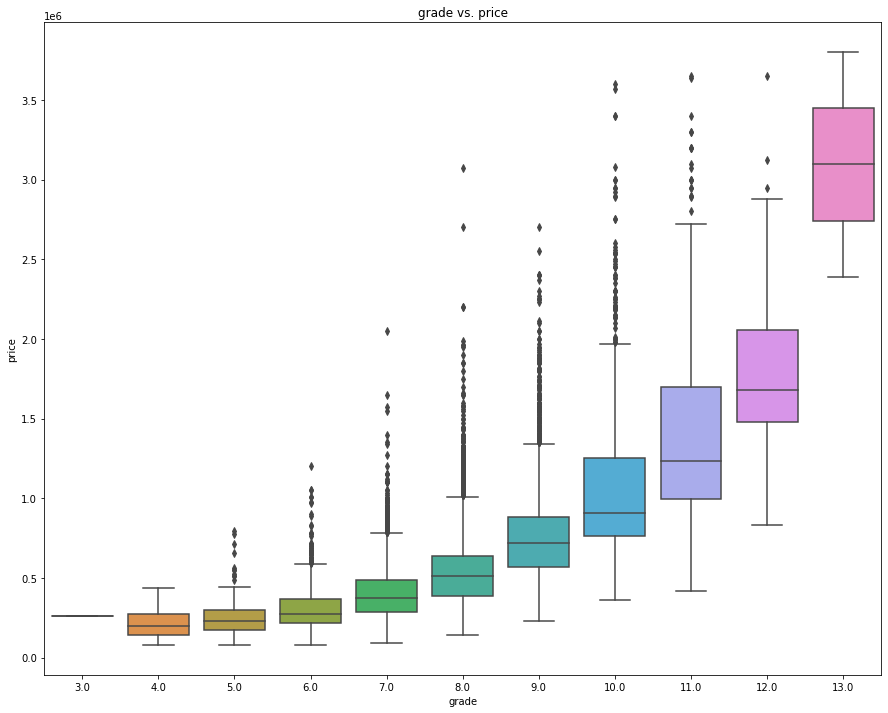

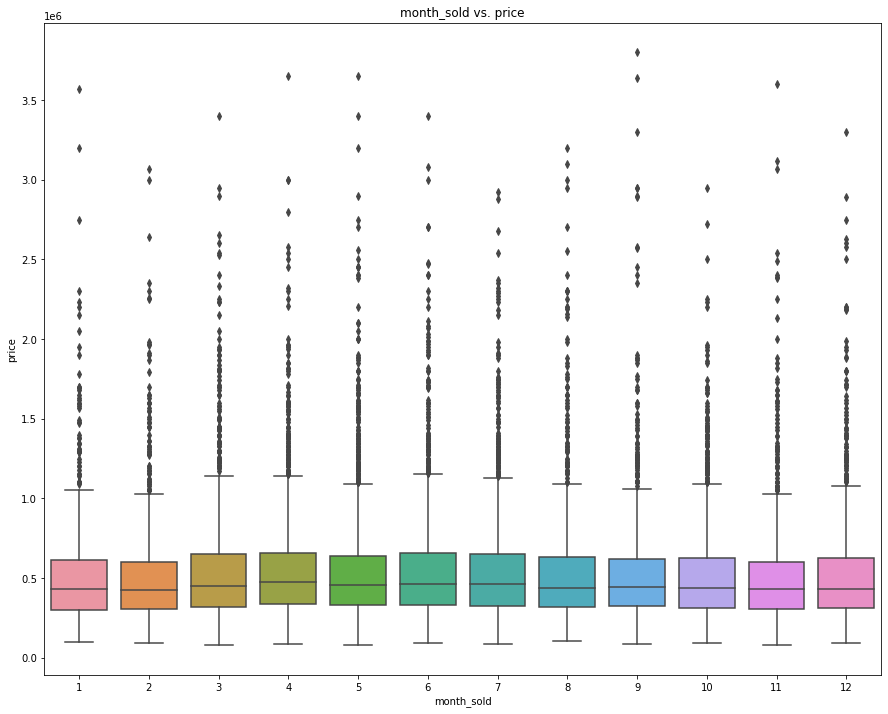

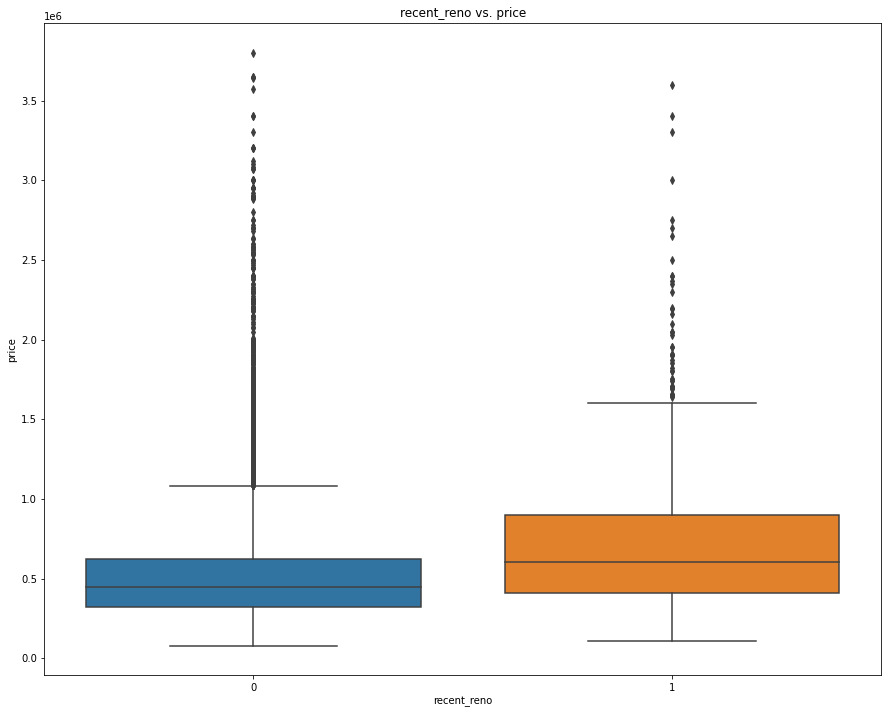

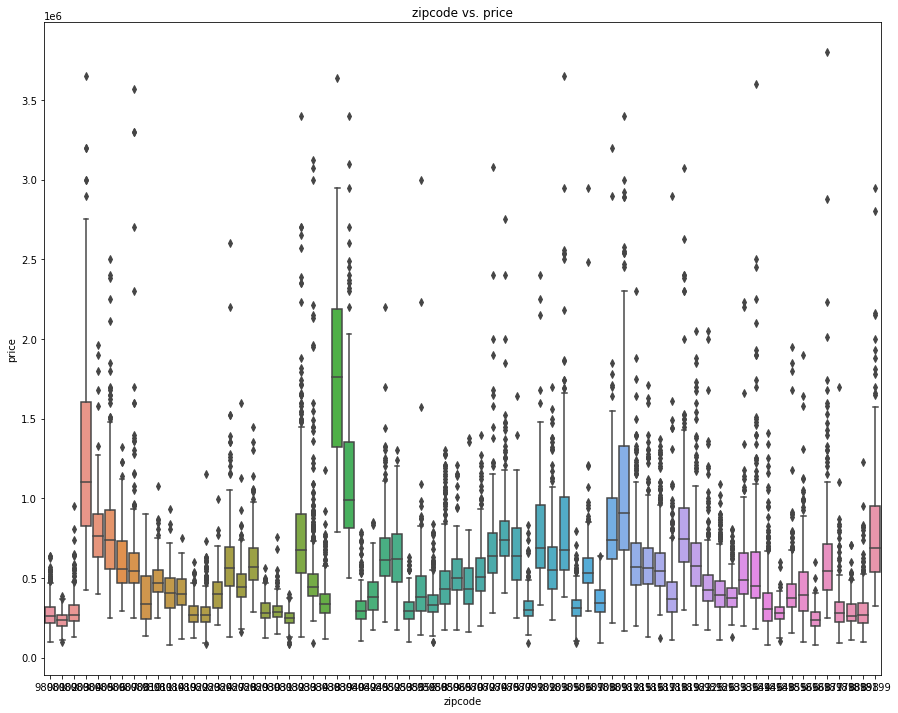

In [128]:
for variable in (kindaboth+categorical):
    ax, figure = plt.subplots(1,1,figsize=(15,12))
    sns.boxplot(x=variable, y='price', data=df2)
    plt.title("{} vs. price".format(variable))

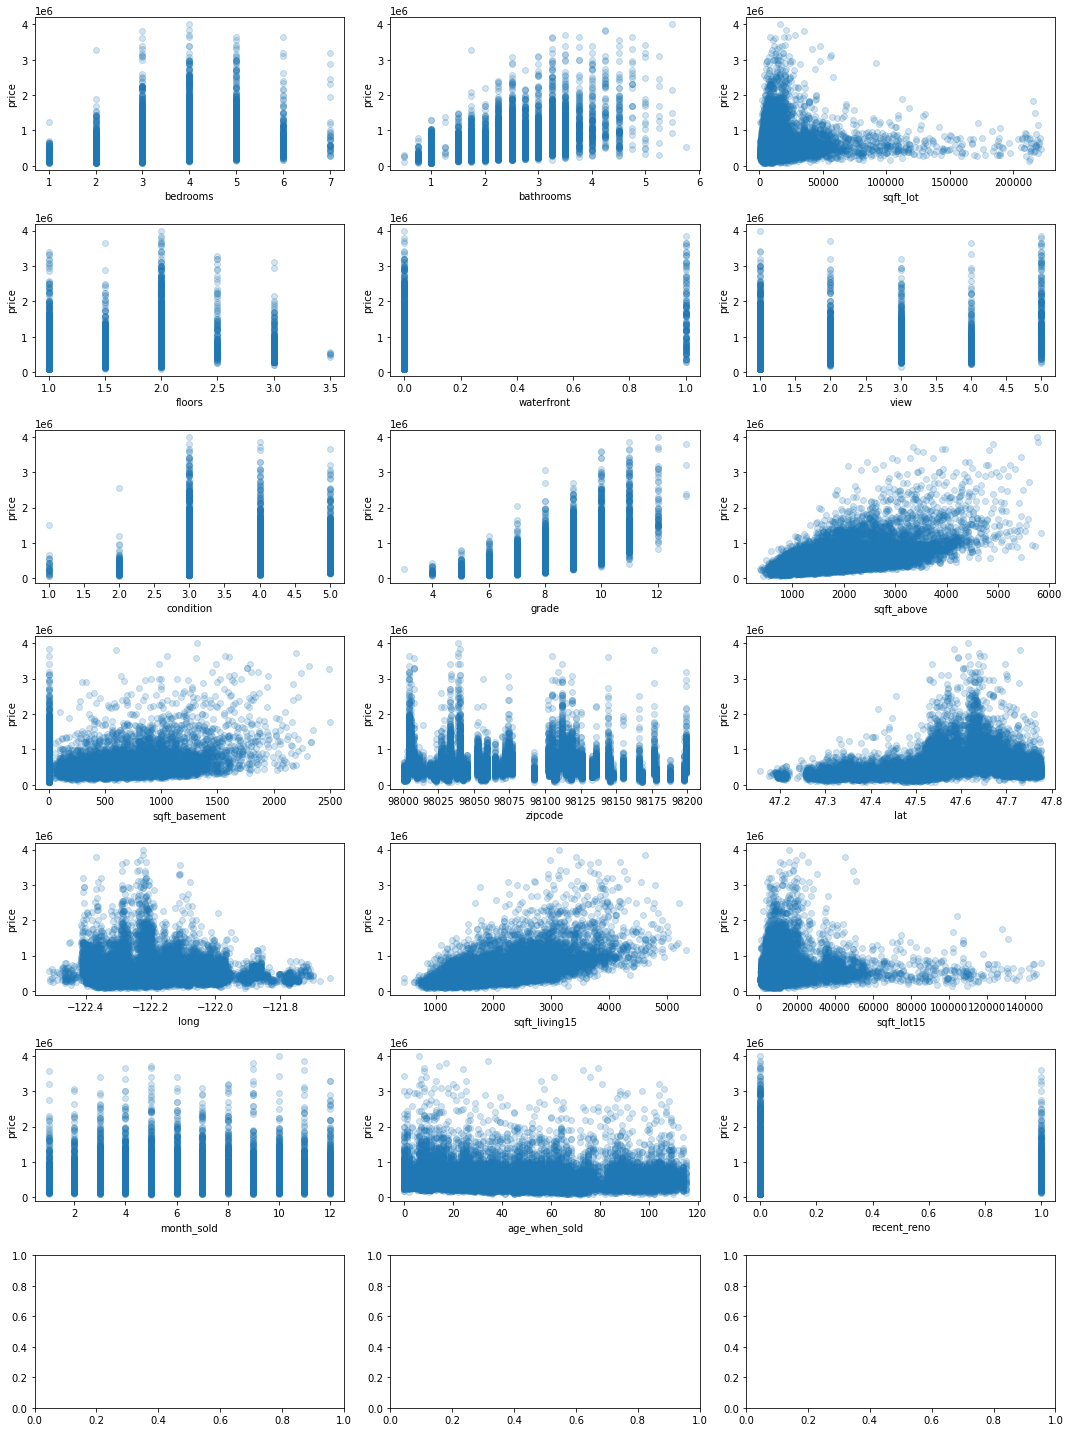

In [119]:
scatterplot_data = df3.drop("price",axis=1)

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(15, 20))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(df3[col], df3["price"], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [ ]:
#learned deep vs shallow from gabriel wtffffff

In [ ]:
# dfgabe = pd.read_csv("data/kc_house_data.csv")

In [ ]:
# dfgabe

In [ ]:
# dfvic = dfgabe[['bedrooms','price']]


In [ ]:
# dfvic['bedrooms'] = 1

In [ ]:
# dfvic

In [ ]:
# dfgabe

In [ ]:
#df2['sqft_basement'].value_counts()

In [ ]:
#df2['sqft_basement'] = df2['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
#df2.loc[df2['sqft_basement'] > 0, 'sqft_basement'] = 1

In [ ]:
df2

In [129]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21022.0,527494.932404,328434.160554,78000.0000,320000.0000,449000.0000,635000.0000,3.800000e+06
bedrooms,21022.0,3.357720,0.880467,1.0000,3.0000,3.0000,4.0000,7.000000e+00
bathrooms,21022.0,2.093283,0.737681,0.5000,1.5000,2.2500,2.5000,5.000000e+00
sqft_lot,21022.0,10773.146989,14058.007965,520.0000,5000.0000,7500.0000,10283.7500,1.776570e+05
floors,21022.0,1.490486,0.540325,1.0000,1.0000,1.5000,2.0000,3.500000e+00
waterfront,21022.0,0.006327,0.079290,0.0000,0.0000,0.0000,0.0000,1.000000e+00
view,21022.0,1.187137,0.672037,1.0000,1.0000,1.0000,1.0000,5.000000e+00
condition,21022.0,3.412473,0.651428,1.0000,3.0000,3.0000,4.0000,5.000000e+00
grade,21022.0,7.624393,1.128283,3.0000,7.0000,7.0000,8.0000,1.300000e+01
sqft_above,21022.0,1754.532442,770.592506,370.0000,1182.5000,1550.0000,2170.0000,5.050000e+03


In [ ]:
df2

In [ ]:
#try dropping all categorical

In [ ]:
# df3x = df2[(numerical+kindaboth)]
# df3y = np.log1p(df2["price"])

In [ ]:
# df3x

In [ ]:
# df3y

In [ ]:
# sm.OLS(df3y, sm.add_constant(df3x)).fit().summary()

In [ ]:
#yikes, this is going the wrong direction. we could have assumed that due to grade and condition being eliminated, which were the
#highest correlated features.

In [ ]:
#lets take a step back or try one hot encoding

In [ ]:
df2

In [130]:
df2[kindaboth+categorical].nunique()

bedrooms        7
bathrooms      19
floors          6
waterfront      2
view            5
condition       5
grade          11
month_sold     12
recent_reno     2
zipcode        70
dtype: int64

In [131]:
df2[categorical].nunique()

waterfront      2
view            5
condition       5
grade          11
month_sold     12
recent_reno     2
zipcode        70
dtype: int64

In [132]:
kindacat = kindaboth+categorical
kindacat

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'month_sold',
 'recent_reno',
 'zipcode']

In [ ]:
#kindacat.append('sqft_basement')

In [133]:
df_categories = pd.DataFrame()

for cat in categorical:
    df_categories[cat]=df2[cat].astype('category')
    df_dummy = pd.get_dummies(df_categories[cat], prefix=cat, drop_first=True) 
    df_categories = df_categories.join(df_dummy)
    df_categories.drop(labels=cat, axis=1, inplace=True)

In [134]:
df_categories

,waterfront_1,view_2.0,view_3.0,view_4.0,view_5.0,condition_2.0,condition_3.0,condition_4.0,condition_5.0,grade_4.0,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
dfohe= df2.drop(categorical, axis=1)
dfohe = pd.concat([dfohe, df_categories], axis=1)
dfohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21022 entries, 0 to 21596
Columns: 112 entries, price to zipcode_98199
dtypes: float64(5), int64(7), uint8(100)
memory usage: 4.6 MB


In [ ]:
# dfohe= df2.drop(kindacat, axis=1)
# dfohe = pd.concat([dfohe, df_categories], axis=1)
# dfohe.info()

In [ ]:
# df2logprice = np.log1p(df2["price"])

In [ ]:
# dfohelogprice = np.log1p(dfohe["price"])
# sum(df2logprice == dfohelogprice)

In [136]:
sm.OLS(dfohe['price'], sm.add_constant(dfohe.drop("price",axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     955.7
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:35:04   Log-Likelihood:            -2.7789e+05
No. Observations:               21022   AIC:                         5.560e+05
Df Residuals:                   20910   BIC:                         5.569e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.211e+07   6.53e+06     -4.919      0.000   -4.49e+07   -1.93e+07
bedrooms      -9104.2880   1424.502     -6.391      0.000   -1.19e+04   -6312.154
bathrooms      2.707e+04   2277.439     11.885      0.000    2.26e+04    3.15e+04
sqft_lot          0.8092      0.109      7.444      0.000       0.596       1.022
floors        -2.617e+04   2738.301     -9.557      0.000   -3.15e+04   -2.08e+04
sqft_above      150.3730      2.834     53.070      0.000     144.819     155.927
sqft_basement   100.4385      3.166     31.721      0.000      94.232     106.645
lat            9.005e+04   5.52e+04      1.631      0.103   -1.82e+04    1.98e+05
long          -2.275e+05   5.18e+04     -4.390      0.000   -3.29e+05   -1.26e+05
sqft_living15    20.5508      2.583      7.957      0.000      15.488      25.613
sqft_lot15       -0.5921      0.145     -4.087      0.000      -0.876      -0.308
age_when_sold   391.9430     55.692      7.038      0.000     282.783     501.103
waterfront_1    5.01e+05   1.46e+04     34.328      0.000    4.72e+05     5.3e+05
view_2.0       7.242e+04   4787.529     15.128      0.000     6.3e+04    8.18e+04
view_3.0       1.644e+05   6679.911     24.606      0.000    1.51e+05    1.77e+05
view_4.0       9.062e+04   7725.249     11.730      0.000    7.55e+04    1.06e+05
view_5.0        3.28e+05   1.01e+04     32.420      0.000    3.08e+05    3.48e+05
condition_2.0   8.79e+04   2.76e+04      3.191      0.001    3.39e+04    1.42e+05
condition_3.0  1.003e+05   2.56e+04      3.917      0.000    5.01e+04     1.5e+05
condition_4.0  1.249e+05   2.56e+04      4.877      0.000    7.47e+04    1.75e+05
condition_5.0   1.71e+05   2.58e+04      6.635      0.000     1.2e+05    2.21e+05
grade_4.0     -1.118e+05   1.37e+05     -0.819      0.413   -3.79e+05    1.56e+05
grade_5.0     -1.475e+05   1.34e+05     -1.098      0.272   -4.11e+05    1.16e+05
grade_6.0     -1.452e+05   1.34e+05     -1.083      0.279   -4.08e+05    1.18e+05
grade_7.0      -1.38e+05   1.34e+05     -1.029      0.303   -4.01e+05    1.25e+05
grade_8.0     -1.106e+05   1.34e+05     -0.824      0.410   -3.74e+05    1.52e+05
grade_9.0     -3.023e+04   1.34e+05     -0.225      0.822   -2.93e+05    2.33e+05
grade_10.0     9.909e+04   1.34e+05      0.738      0.461   -1.64e+05    3.62e+05
grade_11.0     2.956e+05   1.35e+05      2.197      0.028    3.19e+04    5.59e+05
grade_12.0     5.364e+05   1.36e+05      3.942      0.000     2.7e+05    8.03e+05
grade_13.0     1.611e+06   1.65e+05      9.786      0.000    1.29e+06    1.93e+06
month_sold_2   5688.4399   5794.074      0.982      0.326   -5668.394     1.7e+04
month_sold_3   2.568e+04   5357.501      4.793      0.000    1.52e+04    3.62e+04
month_sold_4   2.974e+04   5211.036      5.707      0.000    1.95e+04       4e+04
month_sold_5   1851.4253   5159.987      0.359   

In [ ]:
# sm.OLS(df2logprice, sm.add_constant(dfohe.drop("price",axis=1))).fit().summary()

In [ ]:
#not as good as I had hoped for... try the lab version again below

In [138]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=dfohe.drop("price",axis=1),
    # y=df2logprice,
    y=dfohe['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model (Drop Outliers and OHE of categorical features only)")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

# print("Second Second Model (log transform price)")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()

print("Second Model (using all features)")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model (just using most correlated feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model (Drop Outliers and OHE of categorical features only)
Train score:      0.8347286019499638
Validation score: 0.8312197487317636

Second Model (using all features)
Train score:      0.6962008920298226
Validation score: 0.7127689954787648

Baseline Model (just using most correlated feature
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [ ]:
#odd. using RFECV did not eliminate any features this time around...

In [ ]:
# YOLS = df2logprice
# XOLS = dfohe.drop("price",axis=1)

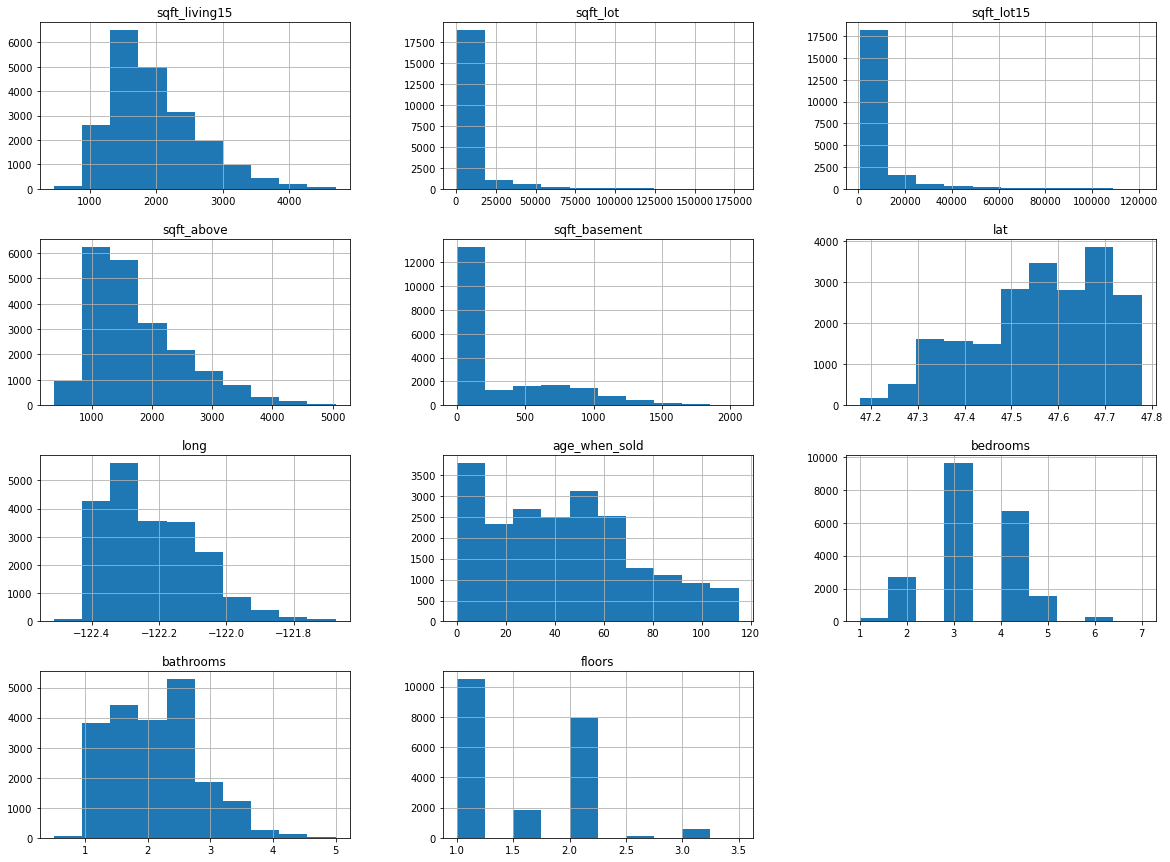

In [139]:
dfohe[numerical+kindaboth].hist(figsize = (20,15));

In [ ]:
#try logging some skewed numerical distributions...


#EVERYTHING ABOVE IS GOOD


####

In [ ]:
# trylog = ['floors', 'bathrooms', 'age_when_sold','lat','sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_above', 'sqft_basement']

In [140]:
trylog = ['sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors']

In [141]:
# trylog = numerical+kindaboth
trylog

['sqft_living15',
 'sqft_lot',
 'sqft_lot15',
 'sqft_above',
 'sqft_basement',
 'bedrooms',
 'bathrooms',
 'floors']

In [ ]:
# trylog.remove('long')

In [142]:
dfohelog = dfohe.copy()

In [ ]:
numerical

In [143]:
for feat in trylog:
    dfohelog[feat] = dfohelog[feat].map(lambda x: np.log1p(x))

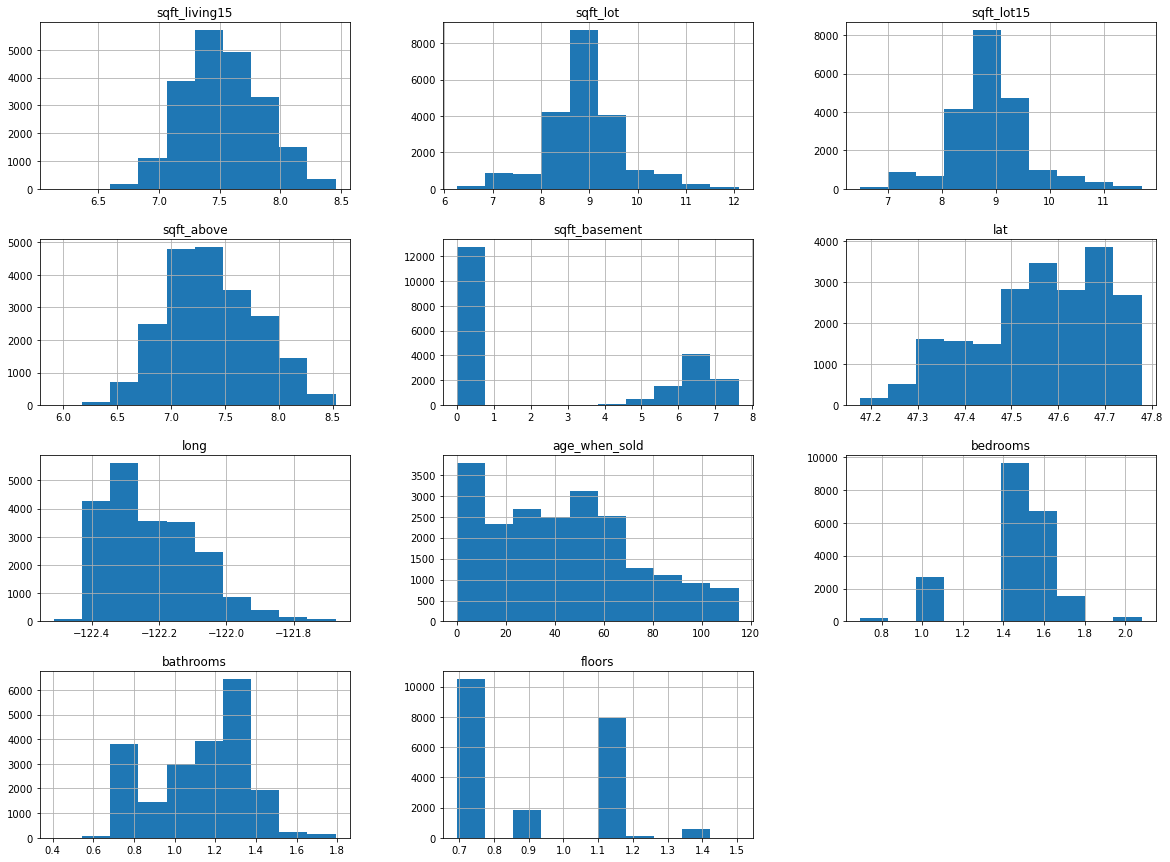

In [144]:
dfohelog[numerical+kindaboth].hist(figsize = (20,15));

In [145]:
# YOLS = df2logprice
YOLS = dfohelog['price']
XOLS = dfohelog.drop("price",axis=1)

In [146]:
sm.OLS(YOLS, sm.add_constant(XOLS)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     908.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:39:01   Log-Likelihood:            -2.7834e+05
No. Observations:               21022   AIC:                         5.569e+05
Df Residuals:                   20910   BIC:                         5.578e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.061e+07   6.66e+06     -6.100      0.000   -5.37e+07   -2.76e+07
bedrooms      -1.826e+04   6246.185     -2.923      0.003   -3.05e+04   -6013.024
bathrooms      7.302e+04   7076.193     10.319      0.000    5.92e+04    8.69e+04
sqft_lot       3.579e+04   3106.691     11.521      0.000    2.97e+04    4.19e+04
floors         -5.47e+04   7624.339     -7.174      0.000   -6.96e+04   -3.98e+04
sqft_above     2.438e+05   5587.089     43.644      0.000    2.33e+05    2.55e+05
sqft_basement  1.039e+04    428.332     24.257      0.000    9550.506    1.12e+04
lat            8.943e+04   5.64e+04      1.585      0.113   -2.11e+04       2e+05
long          -2.814e+05   5.28e+04     -5.330      0.000   -3.85e+05   -1.78e+05
sqft_living15  4.165e+04   5205.511      8.001      0.000    3.14e+04    5.19e+04
sqft_lot15     -1.18e+04   3399.725     -3.472      0.001   -1.85e+04   -5139.621
age_when_sold   161.4633     58.357      2.767      0.006      47.078     275.848
waterfront_1   5.065e+05   1.49e+04     33.972      0.000    4.77e+05    5.36e+05
view_2.0        7.51e+04   4880.307     15.388      0.000    6.55e+04    8.47e+04
view_3.0         1.7e+05   6789.756     25.044      0.000    1.57e+05    1.83e+05
view_4.0       9.244e+04   7885.955     11.722      0.000     7.7e+04    1.08e+05
view_5.0       3.307e+05   1.03e+04     32.090      0.000    3.11e+05    3.51e+05
condition_2.0  8.914e+04   2.81e+04      3.167      0.002     3.4e+04    1.44e+05
condition_3.0  1.079e+05   2.62e+04      4.124      0.000    5.66e+04    1.59e+05
condition_4.0  1.314e+05   2.62e+04      5.018      0.000    8.01e+04    1.83e+05
condition_5.0  1.846e+05   2.63e+04      7.007      0.000    1.33e+05    2.36e+05
grade_4.0     -1.427e+05   1.39e+05     -1.023      0.306   -4.16e+05    1.31e+05
grade_5.0     -2.224e+05   1.37e+05     -1.620      0.105   -4.91e+05    4.67e+04
grade_6.0     -2.431e+05   1.37e+05     -1.774      0.076   -5.12e+05    2.55e+04
grade_7.0     -2.575e+05   1.37e+05     -1.879      0.060   -5.26e+05    1.11e+04
grade_8.0     -2.312e+05   1.37e+05     -1.687      0.092      -5e+05    3.75e+04
grade_9.0     -1.291e+05   1.37e+05     -0.941      0.347   -3.98e+05     1.4e+05
grade_10.0     3.403e+04   1.37e+05      0.248      0.804   -2.35e+05    3.03e+05
grade_11.0     2.795e+05   1.37e+05      2.033      0.042    1.01e+04    5.49e+05
grade_12.0     5.538e+05   1.39e+05      3.985      0.000    2.81e+05    8.26e+05
grade_13.0     1.715e+06   1.68e+05     10.204      0.000    1.39e+06    2.04e+06
month_sold_2   5027.5968   5917.819      0.850      0.396   -6571.787    1.66e+04
month_sold_3   2.349e+04   5472.069      4.292      0.000    1.28e+04    3.42e+04
month_sold_4   2.784e+04   5322.756      5.230      0.000    1.74e+04    3.83e+04
month_sold_5   1836.2106   5269.912      0.348   

In [ ]:
splitter

In [147]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=dfohelog.drop("price",axis=1),
    # y=df2logprice,
    y=dfohelog['price'],
    return_train_score=True,
    cv=splitter
)
print("Current Model (log transform sq ft numerical features)")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model (OHE of categorical features only)")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

# print("Second Second Model (log transform price)")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()

print("Second Model (using all features)")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model (just using most correlated feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model (log transform sq ft numerical features)
Train score:      0.8271603284242491
Validation score: 0.8251496677524136

Third Model (OHE of categorical features only)
Train score:      0.8347286019499638
Validation score: 0.8312197487317636

Second Model (using all features)
Train score:      0.6962008920298226
Validation score: 0.7127689954787648

Baseline Model (just using most correlated feature
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [148]:
dfohe

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,5650,1.0,1180,0,47.5112,-122.257,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7242,2.0,2170,400,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,770,0,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5000,1.0,1050,910,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,8080,1.0,1680,0,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,1530,0,47.6993,-122.346,1530,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,5813,2.0,2310,0,47.5107,-122.362,1830,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,2,0.75,1350,2.0,1020,0,47.5944,-122.299,1020,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,3,2.50,2388,2.0,1600,0,47.5345,-122.069,1410,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Retry scale cuz i think below is fucked up

In [ ]:
# Yscaled =  np.log1p(dfohe['price'])

In [ ]:
##retry scaling cuz i think the one i did below is fucked up.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
# scaler.fit(dfohe.drop("price",axis=1))

In [ ]:
# Xscaled = pd.DataFrame(scaler.transform(dfohe.drop("price",axis=1)), columns=dfohe.drop("price",axis=1).columns)

In [ ]:
# Xscaled

In [ ]:
# Yscaled =  dfohe['price']

In [ ]:
# sm.OLS(Yscaled, sm.add_constant(Xscaled)).fit().summary()

In [ ]:
dfohelog

In [ ]:
#trying scaling

In [ ]:
numerical

In [ ]:
# toscale = ['sqft_living15', 'sqft_lot',
#  'sqft_lot15',
#  'sqft_above',
#  'sqft_basement', 'age_when_sold', 'lat','long']

In [150]:
toscale = [numerical+kindaboth]

In [151]:
toscale

[['sqft_living15',
  'sqft_lot',
  'sqft_lot15',
  'sqft_above',
  'sqft_basement',
  'lat',
  'long',
  'age_when_sold',
  'bedrooms',
  'bathrooms',
  'floors']]

In [ ]:
# dfohestd = dfohe.copy()

# for feature in toscale:
#     dfohestd[feature] = (dfohestd[feature]-np.mean(dfohestd[feature]))/np.sqrt(np.var(dfohestd[feature]))
  

In [ ]:
# YOLS = df2logprice
# XOLS = dfohestd.drop("price",axis=1)

In [152]:
dfoheminmax = dfohelog.copy()

for feature in toscale:
    d_min = dfoheminmax[feature].min()
    d_max = dfoheminmax[feature].max()
    dfoheminmax[feature] = (dfoheminmax[feature] - d_min) / (d_max - d_min)

In [ ]:
# dfoheminmax = dfohe.copy()

# for feature in numerical:
#     d_min = dfoheminmax[feature].min()
#     d_max = dfoheminmax[feature].max()
#     dfoheminmax[feature] = (dfoheminmax[feature] - d_min) / (d_max - d_min)

In [ ]:
# dfoheminmax = dfohe.copy()

# for feature in toscale:
#     d_min = dfoheminmax[feature].min()
#     d_max = dfoheminmax[feature].max()
#     dfoheminmax[feature] = (dfoheminmax[feature] - d_min) / (d_max - d_min)

In [153]:
dfoheminmax.describe().transpose().head(50)

,count,mean,std,min,25%,50%,75%,max
price,21022.0,527494.932404,328434.160554,78000.0,320000.000000,449000.000000,635000.000000,3800000.0
bedrooms,21022.0,0.546698,0.149511,0.0,0.500000,0.500000,0.660964,1.0
bathrooms,21022.0,0.500830,0.177579,0.0,0.368483,0.557739,0.611196,1.0
sqft_lot,21022.0,0.457364,0.135024,0.0,0.387808,0.457322,0.511443,1.0
floors,21022.0,0.242776,0.258493,0.0,0.000000,0.275170,0.500000,1.0
sqft_above,21022.0,0.561528,0.159239,0.0,0.444259,0.547827,0.676617,1.0
sqft_basement,21022.0,0.331071,0.414450,0.0,0.000000,0.000000,0.829480,1.0
lat,21022.0,0.639949,0.229362,0.0,0.494012,0.659348,0.835329,1.0
long,21022.0,0.351320,0.162580,0.0,0.217703,0.330144,0.455742,1.0
sqft_living15,21022.0,0.602180,0.138262,0.0,0.502588,0.593945,0.699760,1.0


In [154]:
# YOLS = df2logprice
YOLS = dfoheminmax['price']
XOLS = dfoheminmax.drop("price",axis=1)

In [155]:
sm.OLS(YOLS, sm.add_constant(XOLS)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     908.3
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:40:46   Log-Likelihood:            -2.7834e+05
No. Observations:               21022   AIC:                         5.569e+05
Df Residuals:                   20910   BIC:                         5.578e+05
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -9.04e+04   1.41e+05     -0.642      0.521   -3.66e+05    1.85e+05
bedrooms      -2.531e+04   8659.051     -2.923      0.003   -4.23e+04   -8335.822
bathrooms      1.012e+05   9809.687     10.319      0.000     8.2e+04     1.2e+05
sqft_lot       2.087e+05   1.81e+04     11.521      0.000    1.73e+05    2.44e+05
floors        -4.436e+04   6182.807     -7.174      0.000   -5.65e+04   -3.22e+04
sqft_above     6.367e+05   1.46e+04     43.644      0.000    6.08e+05    6.65e+05
sqft_basement  7.929e+04   3268.577     24.257      0.000    7.29e+04    8.57e+04
lat            5.377e+04   3.39e+04      1.585      0.113   -1.27e+04     1.2e+05
long          -2.352e+05   4.41e+04     -5.330      0.000   -3.22e+05   -1.49e+05
sqft_living15  9.672e+04   1.21e+04      8.001      0.000     7.3e+04     1.2e+05
sqft_lot15    -6.166e+04   1.78e+04     -3.472      0.001   -9.65e+04   -2.69e+04
age_when_sold  1.857e+04   6711.110      2.767      0.006    5413.981    3.17e+04
waterfront_1   5.065e+05   1.49e+04     33.972      0.000    4.77e+05    5.36e+05
view_2.0        7.51e+04   4880.307     15.388      0.000    6.55e+04    8.47e+04
view_3.0         1.7e+05   6789.756     25.044      0.000    1.57e+05    1.83e+05
view_4.0       9.244e+04   7885.955     11.722      0.000     7.7e+04    1.08e+05
view_5.0       3.307e+05   1.03e+04     32.090      0.000    3.11e+05    3.51e+05
condition_2.0  8.914e+04   2.81e+04      3.167      0.002     3.4e+04    1.44e+05
condition_3.0  1.079e+05   2.62e+04      4.124      0.000    5.66e+04    1.59e+05
condition_4.0  1.314e+05   2.62e+04      5.018      0.000    8.01e+04    1.83e+05
condition_5.0  1.846e+05   2.63e+04      7.007      0.000    1.33e+05    2.36e+05
grade_4.0     -1.427e+05   1.39e+05     -1.023      0.306   -4.16e+05    1.31e+05
grade_5.0     -2.224e+05   1.37e+05     -1.620      0.105   -4.91e+05    4.67e+04
grade_6.0     -2.431e+05   1.37e+05     -1.774      0.076   -5.12e+05    2.55e+04
grade_7.0     -2.575e+05   1.37e+05     -1.879      0.060   -5.26e+05    1.11e+04
grade_8.0     -2.312e+05   1.37e+05     -1.687      0.092      -5e+05    3.75e+04
grade_9.0     -1.291e+05   1.37e+05     -0.941      0.347   -3.98e+05     1.4e+05
grade_10.0     3.403e+04   1.37e+05      0.248      0.804   -2.35e+05    3.03e+05
grade_11.0     2.795e+05   1.37e+05      2.033      0.042    1.01e+04    5.49e+05
grade_12.0     5.538e+05   1.39e+05      3.985      0.000    2.81e+05    8.26e+05
grade_13.0     1.715e+06   1.68e+05     10.204      0.000    1.39e+06    2.04e+06
month_sold_2   5027.5968   5917.819      0.850      0.396   -6571.787    1.66e+04
month_sold_3   2.349e+04   5472.069      4.292      0.000    1.28e+04    3.42e+04
month_sold_4   2.784e+04   5322.756      5.230      0.000    1.74e+04    3.83e+04
month_sold_5   1836.2106   5269.912      0.348   

In [ ]:
#both scaling didn't help much

In [156]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=XOLS,
    y=YOLS,
    return_train_score=True,
    cv=splitter
)

print("Current Mdoel (Min Max Scaling)")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()

print("Fourth Model (log transform sq ft numerical features)")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model (OHE of categorical features only)")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

# print("Second Second Model (log transform price)")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()

print("Second Model (using all features)")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model (just using most correlated feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Mdoel (Min Max Scaling)
Train score:      0.8271603266844165
Validation score: -7.313302310062232e+18

Fourth Model (log transform sq ft numerical features)
Train score:      0.8271603284242491
Validation score: 0.8251496677524136

Third Model (OHE of categorical features only)
Train score:      0.8347286019499638
Validation score: 0.8312197487317636

Second Model (using all features)
Train score:      0.6962008920298226
Validation score: 0.7127689954787648

Baseline Model (just using most correlated feature
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


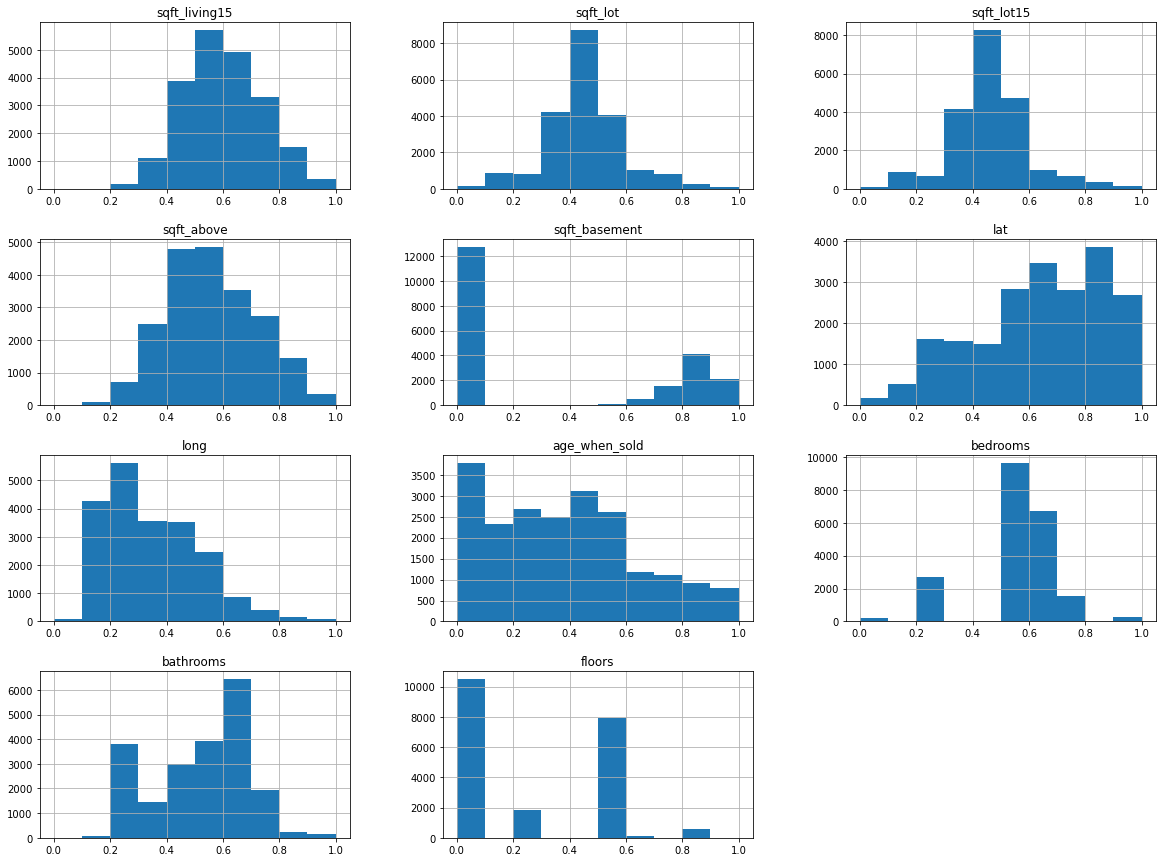

In [157]:
dfoheminmax[numerical+kindaboth].hist(figsize = (20,15));

In [ ]:
trylog2 = ['lat', 'long', 'age_when_sold']

In [ ]:
dflog2 = dfoheminmax.copy()

In [ ]:
for feat in trylog2:
    dflog2[feat] = dflog2[feat].map(lambda x: np.log1p(x))

In [ ]:
# dfohelog2

In [ ]:
dflog2[numerical+kindaboth].hist(figsize = (20,15));

In [ ]:
Yscaled = dflog2['price']
Xscaled = dflog2.drop("price",axis=1)

In [158]:
Yscaled = dfoheminmax['price']
Xscaled = dfoheminmax.drop("price",axis=1)

In [ ]:
# YOLS = dfohe['price']
# XOLS = dfohe.drop("price",axis=1)

In [159]:
#on the right track, kind of. not good enough. try re-choosing best features and some transformations.

# Run this cell without changes

from sklearn.feature_selection import RFECV

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(Xscaled,Yscaled)

# Print the results
print("Was the column selected?")
for index, col in enumerate(Xscaled.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: False
bathrooms: False
sqft_lot: True
floors: False
sqft_above: True
sqft_basement: True
lat: True
long: False
sqft_living15: True
sqft_lot15: True
age_when_sold: False
waterfront_1: True
view_2.0: True
view_3.0: True
view_4.0: True
view_5.0: True
condition_2.0: True
condition_3.0: True
condition_4.0: True
condition_5.0: True
grade_4.0: True
grade_5.0: True
grade_6.0: True
grade_7.0: True
grade_8.0: True
grade_9.0: True
grade_10.0: False
grade_11.0: True
grade_12.0: True
grade_13.0: True
month_sold_2: False
month_sold_3: False
month_sold_4: False
month_sold_5: False
month_sold_6: False
month_sold_7: False
month_sold_8: False
month_sold_9: False
month_sold_10: False
month_sold_11: False
month_sold_12: False
recent_reno_1: False
zipcode_98002: False
zipcode_98003: False
zipcode_98004: True
zipcode_98005: True
zipcode_98006: True
zipcode_98007: True
zipcode_98008: True
zipcode_98010: False
zipcode_98011: False
zipcode_98014: False
zipcode_98019: False
zi

In [ ]:
# # Run this cell without changes

# from sklearn.feature_selection import RFECV
# #from sklearn.preprocessing import StandardScaler

# # Importances are based on coefficient magnitude, so
# # we need to scale the data to normalize the coefficients
# X_train_for_RFECV = StandardScaler().fit_transform(XOLS)

# model_for_RFECV = LinearRegression()

# # Instantiate and fit the selector
# selector = RFECV(model_for_RFECV, cv=splitter)
# selector.fit(X_train_for_RFECV, YOLS)

# # Print the results
# print("Was the column selected?")
# for index, col in enumerate(dfohe.drop("price",axis=1).columns):
#     print(f"{col}: {selector.support_[index]}")

In [160]:
Xscaled.columns[selector.support_]

Index(['sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'sqft_lot15', 'waterfront_1', 'view_2.0', 'view_3.0', 'view_4.0',
       'view_5.0', 'condition_2.0', 'condition_3.0', 'condition_4.0',
       'condition_5.0', 'grade_4.0', 'grade_5.0', 'grade_6.0', 'grade_7.0',
       'grade_8.0', 'grade_9.0', 'grade_11.0', 'grade_12.0', 'grade_13.0',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98029', 'zipcode_98033', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98052', 'zipcode_98070', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98107', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98126',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98199'],
      dtype='object')

In [161]:
RFECV_features = Xscaled.columns[selector.support_]

In [162]:
RFECV_features

Index(['sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'sqft_lot15', 'waterfront_1', 'view_2.0', 'view_3.0', 'view_4.0',
       'view_5.0', 'condition_2.0', 'condition_3.0', 'condition_4.0',
       'condition_5.0', 'grade_4.0', 'grade_5.0', 'grade_6.0', 'grade_7.0',
       'grade_8.0', 'grade_9.0', 'grade_11.0', 'grade_12.0', 'grade_13.0',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98029', 'zipcode_98033', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98052', 'zipcode_98070', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98107', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98126',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98199'],
      dtype='object')

In [163]:
sm.OLS(Yscaled, sm.add_constant(Xscaled[RFECV_features])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1823.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:42:13   Log-Likelihood:            -2.7906e+05
No. Observations:               21022   AIC:                         5.582e+05
Df Residuals:                   20970   BIC:                         5.586e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.372e+05   2.96e+04     -4.635      0.000   -1.95e+05   -7.92e+04
sqft_lot       2.142e+05    1.8e+04     11.908      0.000    1.79e+05    2.49e+05
sqft_above     6.517e+05   1.13e+04     57.507      0.000     6.3e+05    6.74e+05
sqft_basement  9.738e+04   2774.349     35.099      0.000    9.19e+04    1.03e+05
lat            2.614e+05   4774.722     54.743      0.000    2.52e+05    2.71e+05
sqft_living15  1.019e+05   1.19e+04      8.528      0.000    7.85e+04    1.25e+05
sqft_lot15    -7.792e+04    1.8e+04     -4.338      0.000   -1.13e+05   -4.27e+04
waterfront_1   5.139e+05   1.53e+04     33.564      0.000    4.84e+05    5.44e+05
view_2.0       8.058e+04   4967.248     16.222      0.000    7.08e+04    9.03e+04
view_3.0       1.779e+05   6930.620     25.673      0.000    1.64e+05    1.92e+05
view_4.0       9.762e+04   8095.260     12.059      0.000    8.18e+04    1.13e+05
view_5.0       3.433e+05   1.05e+04     32.591      0.000    3.23e+05    3.64e+05
condition_2.0  9.368e+04   2.91e+04      3.225      0.001    3.67e+04    1.51e+05
condition_3.0  1.132e+05    2.7e+04      4.197      0.000    6.03e+04    1.66e+05
condition_4.0  1.359e+05    2.7e+04      5.033      0.000     8.3e+04    1.89e+05
condition_5.0  1.924e+05   2.71e+04      7.089      0.000    1.39e+05    2.46e+05
grade_4.0     -1.791e+05   2.83e+04     -6.320      0.000   -2.35e+05   -1.24e+05
grade_5.0      -2.61e+05   1.17e+04    -22.350      0.000   -2.84e+05   -2.38e+05
grade_6.0     -2.877e+05   7190.145    -40.019      0.000   -3.02e+05   -2.74e+05
grade_7.0     -3.028e+05   5782.645    -52.362      0.000   -3.14e+05   -2.91e+05
grade_8.0     -2.747e+05   5243.170    -52.387      0.000   -2.85e+05   -2.64e+05
grade_9.0     -1.712e+05   5267.652    -32.493      0.000   -1.81e+05   -1.61e+05
grade_11.0     2.403e+05   9066.061     26.509      0.000    2.23e+05    2.58e+05
grade_12.0     5.144e+05   2.29e+04     22.512      0.000     4.7e+05    5.59e+05
grade_13.0     1.687e+06      1e+05     16.850      0.000    1.49e+06    1.88e+06
zipcode_98004  6.046e+05   8397.863     71.996      0.000    5.88e+05    6.21e+05
zipcode_98005  1.848e+05   1.12e+04     16.480      0.000    1.63e+05    2.07e+05
zipcode_98006  1.483e+05   6852.452     21.635      0.000    1.35e+05    1.62e+05
zipcode_98007  1.223e+05    1.2e+04     10.188      0.000    9.88e+04    1.46e+05
zipcode_98008  1.357e+05   8567.143     15.845      0.000    1.19e+05    1.53e+05
zipcode_98029  1.121e+05   8179.373     13.704      0.000    9.61e+04    1.28e+05
zipcode_98033  2.043e+05   7057.720     28.940      0.000     1.9e+05    2.18e+05
zipcode_98039  9.826e+05   2.22e+04     44.284      0.000    9.39e+05    1.03e+06
zipcode_98040   3.99e+05   8868.086     44.997      0.000    3.82e+05    4.16e+05
zipcode_98052  7.942e+04   6200.656     12.808   

In [164]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=Xscaled[RFECV_features],
    y=Yscaled,
    return_train_score=True,
    cv=splitter
)

print("Current Model (Recursive Feature Elimination after Min Max Scaling)") 
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model (OHE of categorical features only)")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

# print("Second Second Model (log transform price)")
# print("Train score:     ", second2_model_scores["train_score"].mean())
# print("Validation score:", second2_model_scores["test_score"].mean())
# print()

print("Second Model (using all features)")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model (just using most correlated feature")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model (Recursive Feature Elimination after Min Max Scaling)
Train score:      0.8148116808593625
Validation score: 0.8136807159108201

Third Model (OHE of categorical features only)
Train score:      0.8347286019499638
Validation score: 0.8312197487317636

Second Model (using all features)
Train score:      0.6962008920298226
Validation score: 0.7127689954787648

Baseline Model (just using most correlated feature
Train score:      0.48774659364870426
Validation score: 0.5024006604207555


In [ ]:
#MODEL VALIDATION

In [165]:
linreg = LinearRegression()

In [166]:
X_train, X_val, y_train, y_val = train_test_split(Xscaled[RFECV_features], Yscaled, shuffle=True, test_size=0.25, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_preds = linreg.predict(X_train)
y_val_preds = linreg.predict(X_val)
y_pred = linreg.predict(Xscaled[RFECV_features])

Text(0, 0.5, 'Actual ($)')

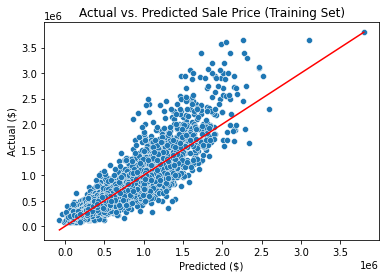

In [167]:
sns.scatterplot(x=y_train_preds, y=y_train)
sns.lineplot(x=y_train_preds, y=y_train_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Training Set)')
plt.xlabel('Predicted ($)')
plt.ylabel('Actual ($)')

Text(0, 0.5, 'Actual ($)')

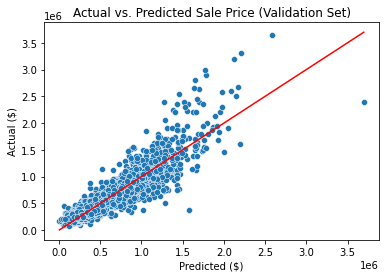

In [168]:
y_val_preds = linreg.predict(X_val)
sns.scatterplot(x=y_val_preds, y=y_val)
sns.lineplot(x=y_val_preds, y=y_val_preds, color='red')
plt.title('Actual vs. Predicted Sale Price (Validation Set)')
plt.xlabel('Predicted ($)')
plt.ylabel('Actual ($)')

In [169]:
X_int = sm.add_constant(Xscaled[RFECV_features])
model = sm.OLS(Yscaled.astype(float), X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1823.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:43:00   Log-Likelihood:            -2.7906e+05
No. Observations:               21022   AIC:                         5.582e+05
Df Residuals:                   20970   BIC:                         5.586e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.372e+05   2.96e+04     -4.635      0.000   -1.95e+05   -7.92e+04
sqft_lot       2.142e+05    1.8e+04     11.908      0.000    1.79e+05    2.49e+05
sqft_above     6.517e+05   1.13e+04     57.507      0.000     6.3e+05    6.74e+05
sqft_basement  9.738e+04   2774.349     35.099      0.000    9.19e+04    1.03e+05
lat            2.614e+05   4774.722     54.743      0.000    2.52e+05    2.71e+05
sqft_living15  1.019e+05   1.19e+04      8.528      0.000    7.85e+04    1.25e+05
sqft_lot15    -7.792e+04    1.8e+04     -4.338      0.000   -1.13e+05   -4.27e+04
waterfront_1   5.139e+05   1.53e+04     33.564      0.000    4.84e+05    5.44e+05
view_2.0       8.058e+04   4967.248     16.222      0.000    7.08e+04    9.03e+04
view_3.0       1.779e+05   6930.620     25.673      0.000    1.64e+05    1.92e+05
view_4.0       9.762e+04   8095.260     12.059      0.000    8.18e+04    1.13e+05
view_5.0       3.433e+05   1.05e+04     32.591      0.000    3.23e+05    3.64e+05
condition_2.0  9.368e+04   2.91e+04      3.225      0.001    3.67e+04    1.51e+05
condition_3.0  1.132e+05    2.7e+04      4.197      0.000    6.03e+04    1.66e+05
condition_4.0  1.359e+05    2.7e+04      5.033      0.000     8.3e+04    1.89e+05
condition_5.0  1.924e+05   2.71e+04      7.089      0.000    1.39e+05    2.46e+05
grade_4.0     -1.791e+05   2.83e+04     -6.320      0.000   -2.35e+05   -1.24e+05
grade_5.0      -2.61e+05   1.17e+04    -22.350      0.000   -2.84e+05   -2.38e+05
grade_6.0     -2.877e+05   7190.145    -40.019      0.000   -3.02e+05   -2.74e+05
grade_7.0     -3.028e+05   5782.645    -52.362      0.000   -3.14e+05   -2.91e+05
grade_8.0     -2.747e+05   5243.170    -52.387      0.000   -2.85e+05   -2.64e+05
grade_9.0     -1.712e+05   5267.652    -32.493      0.000   -1.81e+05   -1.61e+05
grade_11.0     2.403e+05   9066.061     26.509      0.000    2.23e+05    2.58e+05
grade_12.0     5.144e+05   2.29e+04     22.512      0.000     4.7e+05    5.59e+05
grade_13.0     1.687e+06      1e+05     16.850      0.000    1.49e+06    1.88e+06
zipcode_98004  6.046e+05   8397.863     71.996      0.000    5.88e+05    6.21e+05
zipcode_98005  1.848e+05   1.12e+04     16.480      0.000    1.63e+05    2.07e+05
zipcode_98006  1.483e+05   6852.452     21.635      0.000    1.35e+05    1.62e+05
zipcode_98007  1.223e+05    1.2e+04     10.188      0.000    9.88e+04    1.46e+05
zipcode_98008  1.357e+05   8567.143     15.845      0.000    1.19e+05    1.53e+05
zipcode_98029  1.121e+05   8179.373     13.704      0.000    9.61e+04    1.28e+05
zipcode_98033  2.043e+05   7057.720     28.940      0.000     1.9e+05    2.18e+05
zipcode_98039  9.826e+05   2.22e+04     44.284      0.000    9.39e+05    1.03e+06
zipcode_98040   3.99e+05   8868.086     44.997      0.000    3.82e+05    4.16e+05
zipcode_98052  7.942e+04   6200.656     12.808   

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.histplot(Yscaled, label='Actual', color='red', binwidth=0.1)
sns.histplot(y_pred, label='Predictions', color='orange', binwidth=0.1)
plt.legend()

In [ ]:
sm.graphics.qqplot(model.resid, line='45',fit=True);

In [ ]:
plt.scatter(Yscaled,model.resid)

In [ ]:
model.params.sort_values().round(4)

In [ ]:
XOLS

In [ ]:
dfoheminmax

In [ ]:
dfoheminmax['price'] = dfoheminmax['price'].map(lambda x: np.log1p(x))

In [ ]:
dfoheminmax

In [ ]:
newlist = list(RFECV_features)

In [ ]:
newlist.append('price')

In [ ]:
newlist

In [ ]:
df = dfoheminmax[newlist]

In [ ]:
dfcorr=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
dfcorr['pairs'] = list(zip(dfcorr.level_0, dfcorr.level_1))

# set index to pairs
dfcorr.set_index(['pairs'], inplace = True)

#d rop level columns
dfcorr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
dfcorr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
dfcorr.drop_duplicates(inplace=True)

dfcorr[(dfcorr.cc>.7) & (dfcorr.cc <1)]

In [ ]:
df = df.drop("condition_3.0", axis=1)

In [ ]:
YOLS = df['price']
XOLS = df.drop("price", axis=1)

In [ ]:
#try out just the features sklearn chose

In [ ]:
sm.OLS(YOLS, sm.add_constant(XOLS)).fit().summary()

In [ ]:
# RFECV_features = ['sqft_living',

# 'age_when_sold',
# 'bedrooms_4',

# 'floors_3.0',

# 'waterfront_1',

# 'condition_3.0',
# 'condition_4.0',
# 'condition_5.0',
# 'bathrooms_7.75',
# 'grade_7.0',
# 'grade_8.0',
# 'grade_9.0',
# 'grade_10.0',
# 'grade_11.0',
# 'grade_12.0',
# 'grade_13.0',
# 'recent_reno_1',
# 'sqft_basement_1']


In [ ]:
# RFECV_features = ['bedrooms',
# 'bathrooms',
# 'sqft_living',
# 'sqft_lot',
# 'floors',
# 'sqft_basement',
# 'age_when_sold',
# 'waterfront_1',
# 'condition_3.0',
# 'condition_4.0',
# 'condition_5.0',
# 'grade_6.0',
# 'grade_7.0',
# 'grade_8.0',
# 'grade_9.0',
# 'grade_10.0',
# 'grade_11.0',
# 'grade_12.0',
# 'grade_13.0',
# 'month_sold_3',
# 'month_sold_4',
# 'month_sold_5',
# 'recent_reno_1']

In [ ]:
dfohe[RFECV_features] 

In [ ]:
dfohe[RFECV_features].hist(figsize = (20,15));

In [ ]:
sm.OLS(dfohe['price'], sm.add_constant(dfohe[RFECV_features])).fit().summary()

In [ ]:
fourth_model = LinearRegression()

fourth_model_scores = cross_validate(
    estimator=fourth_model,
    X=dfohe[RFECV_features],
    y=dfohe['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
#marginal improvement. try transforms
len(dfohe)

In [ ]:
dfohe

In [ ]:
dfohe.info()

In [ ]:
dfohe.describe().transpose()

In [ ]:
dfohe.columns

In [ ]:
dfohe

In [ ]:
tolog = numerical+kindaboth
tolog

In [ ]:
tolog.remove('sqft_basement') #remove cuz 0's, alternative is to change to simple categorical
#tolog.remove('age_when_sold') #remove cuz 0's, alternative is to assign all 0 yr houses as 1 yr old.
tolog

In [ ]:
dfohe['age_when_sold'] = dfohe['age_when_sold'].apply(lambda x: .5 if x == 0 else x)
dfohe['sqft_basement'] = dfohe['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
dfohe[tolog].hist(figsize = (20,15));

In [ ]:
dfohe

In [ ]:
numerical

In [ ]:
kindaboth

In [ ]:
categorical

In [ ]:
RFECV_features.remove("sqft_lot")

In [ ]:
RFECV_features.remove("floors")

In [ ]:
RFECV_features

In [ ]:
#redo test after removing columns

In [ ]:
sm.OLS(dfohe['price'], sm.add_constant(dfohe[RFECV_features])).fit().summary()

In [ ]:
dfohe['age_when_sold'] = dfohe['age_when_sold'].apply(lambda x: 1 if x == 0 else x)

In [ ]:
tolog = ['price','sqft_living']

In [ ]:
tolog = ['sqft_living']

In [ ]:
tolog = ['price']

In [ ]:
dfohelog = dfohe.copy()

In [ ]:
for feat in tolog:
    dfohelog[feat] = dfohelog[feat].map(lambda x: np.log(x))




In [ ]:
dfohelog.describe().transpose()

In [ ]:
dfohelog[tolog].hist(figsize = (20,15));

In [ ]:
sm.OLS(dfohelog['price'], sm.add_constant(dfohelog[RFECV_features])).fit().summary()

In [ ]:
sm.OLS(dfohelog['price'], sm.add_constant(dfohelog.drop("price",axis=1))).fit().summary()

In [ ]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=dfohelog[RFECV_features],
    y=dfohelog['price'],
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()

print("Fourth Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()

print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()

print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
#didn't get better with transformations on numerical dependent variables alone, let do log of price

In [ ]:
dfohelog['price'] = dfohelog['price'].map(lambda x: np.log(x))

In [ ]:
dfohelog['price'].hist(figsize = (6,6));

In [ ]:
sm.OLS(dfohelog['price'], sm.add_constant(dfohelog[RFECV_features])).fit().summary()

In [ ]:
#we continue to go in the wrong direction, we should backtrack and re-start from an earlier step where we had dfohe

In [ ]:
dfohe

In [ ]:
dfohe.describe().transpose()

In [ ]:
numerical

In [ ]:
kindaboth

In [ ]:
categorical

In [ ]:
numerical.remove('sqft_basement')

In [ ]:
categorical.append('sqft_basement')

In [ ]:
numerical

In [ ]:
kindaboth

In [ ]:
categorical

In [ ]:
dfohelog2 = dfohe.copy()
dfohelog2['price'] = dfohelog2['price'].map(lambda x: np.log(x))

In [ ]:
#try just log transform of the Y

In [ ]:
sm.OLS(dfohelog2['price'], sm.add_constant(dfohelog2[RFECV_features])).fit().summary()

In [ ]:
#eh not better, let's try scaling instead

In [ ]:
toscale = ['sqft_living','age_when_sold']

In [ ]:
dfoheminmax = dfohe.copy()

for feature in toscale:
    d_min = dfoheminmax[feature].min()
    d_max = dfoheminmax[feature].max()
    dfoheminmax[feature] = (dfoheminmax[feature] - d_min) / (d_max - d_min)


In [ ]:
dfoheminmax

In [ ]:
dfoheminmax.describe().transpose()

In [ ]:
sm.OLS(dfoheminmax['price'], sm.add_constant(dfoheminmax[RFECV_features])).fit().summary()

In [ ]:
RFECV_features.remove('condition_3.0')

In [ ]:
sm.OLS(dfoheminmax['price'], sm.add_constant(dfoheminmax[RFECV_features])).fit().summary()

In [ ]:
#try standard scalar

In [ ]:
dfohestd = dfohe.copy()

for feature in toscale:
    dfohestd[feature] = (dfohestd[feature]-np.mean(dfohestd[feature]))/np.sqrt(np.var(dfohestd[feature]))
    

In [ ]:
sm.OLS(dfohestd['price'], sm.add_constant(dfohestd[RFECV_features])).fit().summary()

In [ ]:
#not helping

In [ ]:
dfohestd

In [ ]:
dfohestd.describe().transpose()

In [ ]:
dfoheminmax[numerical+kindaboth].hist(figsize = (20,15));

In [ ]:
tolog

In [ ]:
dfohelog

In [ ]:
dfohelogscale = dfohelog.copy()

for feature in toscale:
    dfohelogscale[feature] = (dfohelogscale[feature]-np.mean(dfohelogscale[feature]))/np.sqrt(np.var(dfohelogscale[feature]))
    

In [ ]:
dfohelogscale

In [ ]:
sm.OLS(dfohelogscale['price'], sm.add_constant(dfohelogscale[RFECV_features])).fit().summary()

In [ ]:
RFECV_features

In [ ]:
RFECV_features.remove('sqft_lot')

In [ ]:
RFECV_features.remove('floors')

In [ ]:
RFECV_features.remove('bathrooms')